In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 4.9 MB/s 
     |████████████████████████████████| 895 kB 39.0 MB/s 
     |████████████████████████████████| 6.6 MB 39.2 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 596 kB 37.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# ***Importing the tools***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
import re
warnings.filterwarnings('ignore')

# ***Importing the dataset from Drive***

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/VR_4/V4_DATA.csv', delimiter=';', encoding='cp437')

In [ ]:
#lire la base des données ligne par ligne 
pd.set_option('display.max_rows',df.shape[0]+1)
df

Pull_id_1                                            Title_1  \
0         14082   provider/fastly: Make request_condition optional   
1          6533  add `validate_credentials` option to provider-aws   
2         12737                        Update environments.html.md   
3          7557        Remove redundant const from command package   
4          6956  provider/aws: Fixing IAM data source policy ge...   
5          9482  provider/aws Skip importing routes for VPC end...   
6          2571       provider/aws: Allow ELB name to be generated   
7          3860                 provider/aws: Lb cookie stickiness   
8         13852    command: Add flag for updating modules on init.   
9         12829                        Fix ECS field inconsistency   
10         1285  Make the device name for attached disks equal ...   
11         1952                         Add support for SNS topics   
12         1697   provider/gce: Convert instance scopes to TypeSet   
13         2086  provider/aws: Add IAM Server Certificate resource   
14         4780                       AWS SQS policy normalization   
15        11677   provider/aws: Fix OnceADayWindowFormat Validator   
16         2738  provider/aws: Network Interface private ips ca...   
17         3509  Implement restart policy support in Docker pro...   
18         4662      [WIP] provider/azurerm: add dns zone resource   
19         1801           switch to updated aws-sdk-go credentials   
20         5177                        Update Travis to use Go 1.6   
21         3259              provider/aws: CloudFront Distribution   
22         9789  `instance_profile` is a required parameter whe...   
23         1214     provider/aws: expose Route 53 zone nameservers   
24         7617  provider/aws: Added the ability to import aws_...   
25         1526  AWS/Route53Zone - create private hosted zone a...   
26        14263            Propagate AWS CodePipeline action roles   
27         1357  Breaking security group rules out into it's ow...   
28         3663       get profile name even if profile path exists   
29         1618  provider/aws: Fix issue with updating VPC Secu...   
30          339                                    Aws volume size   
31        11093  provider/aws require db option group name to b...   
32         8791  provider/azurerm: Fixes for azurerm subnet pro...   
33         5850    provider/aws: Add support for AWSConfig service   
34         1888        provider/aws: adding support for SQS queues   
35         6503  Use the new AWSClient.accountid when generatin...   
36         2791          google: Expand tilde in account_file path   
37         1644  Bug: Only prefix hashcode with TypeSet diff ma...   
38        14190  provider/google: Move 404 checking into a func...   
39         7485  helper/schema: Make nested Set(s) in List(s) w...   
40         8948  Correct Proxy setting for openstack provider: ...   
41        10870  provider/aws: fix the datasource aws_route_tab...   
42         5269       add resource aws_rds_cluster_parameter_group   
43         9463  provider/aws: Support S3 bucket object upload ...   
44        12544  Update buffer swap test to use better variable...   
45         8953          readline: concievably typo in readline.js   
46        13570             doc: fix out of date napi_callback doc   
47         6788                               upgrade npm to 3.9.0   
48         4975             feature: Add Promises interface for fs   
49         9351                   LICENSE update from dependencies   
50         2312                  tls: fix session resumption check   
51         9482        doc: fix minor style issue in code examples   
52         5003          doc: fix anchor links from stream to HTTP   
53         4110                       deps: upgrade to npm 2.14.12   
54         5519       build: remove --quiet from eslint invocation   
55         1936                          net: Fixing error message   
56          533 

In [ ]:
#voir les valeurs manquantes
df.isnull().sum().sort_values(ascending=False)

Pull_id_1    0
Title_1      0
Content_1    0
Pull_id_2    0
Title_2      0
Content_2    0
Label        0
dtype: int64

# ***Loading the Pre-trained BERT model***

In [ ]:
import time
start = time.time()

model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# ***Remove stop words***

In [ ]:
df['Title_1']= df['Title_1'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once'  'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

In [ ]:
df['Title_2']= df['Title_2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once'  'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

In [ ]:
df['Content_1']= df['Content_1'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once'  'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

In [ ]:
df['Content_2']= df['Content_2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once'  'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

# ***Remove Digits :***

In [ ]:
df['Title_1']= df['Title_1'].str.replace(r'0', '')
df['Title_1']= df['Title_1'].str.replace(r'1', '')
df['Title_1']= df['Title_1'].str.replace(r'2', '')
df['Title_1']= df['Title_1'].str.replace(r'3', '')
df['Title_1']= df['Title_1'].str.replace(r'4', '')
df['Title_1']= df['Title_1'].str.replace(r'5', '')
df['Title_1']= df['Title_1'].str.replace(r'6', '')
df['Title_1']= df['Title_1'].str.replace(r'7', '')
df['Title_1']= df['Title_1'].str.replace(r'8', '')
df['Title_1']= df['Title_1'].str.replace(r'9', '')

In [ ]:
df['Title_2']= df['Title_2'].str.replace(r'0', '')
df['Title_2']= df['Title_2'].str.replace(r'1', '')
df['Title_2']= df['Title_2'].str.replace(r'2', '')
df['Title_2']= df['Title_2'].str.replace(r'3', '')
df['Title_2']= df['Title_2'].str.replace(r'4', '')
df['Title_2']= df['Title_2'].str.replace(r'5', '')
df['Title_2']= df['Title_2'].str.replace(r'6', '')
df['Title_2']= df['Title_2'].str.replace(r'7', '')
df['Title_2']= df['Title_2'].str.replace(r'8', '')
df['Title_2']= df['Title_2'].str.replace(r'9', '')

In [ ]:
df['Content_1']= df['Content_1'].str.replace(r'0', '')
df['Content_1']= df['Content_1'].str.replace(r'1', '')
df['Content_1']= df['Content_1'].str.replace(r'2', '')
df['Content_1']= df['Content_1'].str.replace(r'3', '')
df['Content_1']= df['Content_1'].str.replace(r'4', '')
df['Content_1']= df['Content_1'].str.replace(r'5', '')
df['Content_1']= df['Content_1'].str.replace(r'6', '')
df['Content_1']= df['Content_1'].str.replace(r'7', '')
df['Content_1']= df['Content_1'].str.replace(r'8', '')
df['Content_1']= df['Content_1'].str.replace(r'9', '')

In [ ]:
df['Content_2']= df['Content_2'].str.replace(r'0', '')
df['Content_2']= df['Content_2'].str.replace(r'1', '')
df['Content_2']= df['Content_2'].str.replace(r'2', '')
df['Content_2']= df['Content_2'].str.replace(r'3', '')
df['Content_2']= df['Content_2'].str.replace(r'4', '')
df['Content_2']= df['Content_2'].str.replace(r'5', '')
df['Content_2']= df['Content_2'].str.replace(r'6', '')
df['Content_2']= df['Content_2'].str.replace(r'7', '')
df['Content_2']= df['Content_2'].str.replace(r'8', '')
df['Content_2']= df['Content_2'].str.replace(r'9', '')

# ***Remove special characters***

In [ ]:
df['Title_1']= df['Title_1'].str.replace(r'/', '')
df['Title_1']= df['Title_1'].str.replace(r'@', '')
df['Title_1']= df['Title_1'].str.replace(r'!', '')
df['Title_1']= df['Title_1'].str.replace(r'+', '')
df['Title_1']= df['Title_1'].str.replace(r'-', '')
df['Title_1']= df['Title_1'].str.replace(r'/', '')
df['Title_1']= df['Title_1'].str.replace(r':', '')
df['Title_1']= df['Title_1'].str.replace(r';', '')
df['Title_1']= df['Title_1'].str.replace(r'>', '')
df['Title_1']= df['Title_1'].str.replace(r'=', '')
df['Title_1']= df['Title_1'].str.replace(r'<', '')
df['Title_1']= df['Title_1'].str.replace(r'(', '')
df['Title_1']= df['Title_1'].str.replace(r')', '')
df['Title_1']= df['Title_1'].str.replace(r'#', '')
df['Title_1']= df['Title_1'].str.replace(r'$', '')
df['Title_1']= df['Title_1'].str.replace(r'*', '')
df['Title_1']= df['Title_1'].str.replace(r'_', '')
df['Title_1']= df['Title_1'].str.replace(r']', '')
df['Title_1']= df['Title_1'].str.replace(r'[', '')
df['Title_1']= df['Title_1'].str.replace(r'{', '')
df['Title_1']= df['Title_1'].str.replace(r'}', '')
df['Title_1']= df['Title_1'].str.replace(r'"', '')
df['Title_1']= df['Title_1'].str.replace(r'&', '')
df['Title_1']= df['Title_1'].str.replace(r'~', '')
df['Title_1']= df['Title_1'].str.replace(r'^', '')
df['Title_1']= df['Title_1'].str.replace(r'°', '')
df['Title_1']= df['Title_1'].str.replace(r'?', '')
df['Title_1']= df['Title_1'].str.replace(r'%', '')

In [ ]:
df['Title_2']= df['Title_2'].str.replace(r'/', '')
df['Title_2']= df['Title_2'].str.replace(r'@', '')
df['Title_2']= df['Title_2'].str.replace(r'!', '')
df['Title_2']= df['Title_2'].str.replace(r'+', '')
df['Title_2']= df['Title_2'].str.replace(r'-', '')
df['Title_2']= df['Title_2'].str.replace(r'/', '')
df['Title_2']= df['Title_2'].str.replace(r':', '')
df['Title_2']= df['Title_2'].str.replace(r';', '')
df['Title_2']= df['Title_2'].str.replace(r'>', '')
df['Title_2']= df['Title_2'].str.replace(r'=', '')
df['Title_2']= df['Title_2'].str.replace(r'<', '')
df['Title_2']= df['Title_2'].str.replace(r'(', '')
df['Title_2']= df['Title_2'].str.replace(r')', '')
df['Title_2']= df['Title_2'].str.replace(r'#', '')
df['Title_2']= df['Title_2'].str.replace(r'$', '')
df['Title_2']= df['Title_2'].str.replace(r'*', '')
df['Title_2']= df['Title_2'].str.replace(r'_', '')
df['Title_2']= df['Title_2'].str.replace(r']', '')
df['Title_2']= df['Title_2'].str.replace(r'[', '')
df['Title_2']= df['Title_2'].str.replace(r'{', '')
df['Title_2']= df['Title_2'].str.replace(r'}', '')
df['Title_2']= df['Title_2'].str.replace(r'"', '')
df['Title_2']= df['Title_2'].str.replace(r'&', '')
df['Title_2']= df['Title_2'].str.replace(r'~', '')
df['Title_2']= df['Title_2'].str.replace(r'^', '')
df['Title_2']= df['Title_2'].str.replace(r'°', '')
df['Title_2']= df['Title_2'].str.replace(r'?', '')
df['Title_2']= df['Title_2'].str.replace(r'%', '')

In [ ]:
df['Content_1']= df['Content_1'].str.replace(r'/', '')
df['Content_1']= df['Content_1'].str.replace(r'@', '')
df['Content_1']= df['Content_1'].str.replace(r'!', '')
df['Content_1']= df['Content_1'].str.replace(r'+', '')
df['Content_1']= df['Content_1'].str.replace(r'-', '')
df['Content_1']= df['Content_1'].str.replace(r'/', '')
df['Content_1']= df['Content_1'].str.replace(r':', '')
df['Content_1']= df['Content_1'].str.replace(r';', '')
df['Content_1']= df['Content_1'].str.replace(r'>', '')
df['Content_1']= df['Content_1'].str.replace(r'=', '')
df['Content_1']= df['Content_1'].str.replace(r'<', '')
df['Content_1']= df['Content_1'].str.replace(r'(', '')
df['Content_1']= df['Content_1'].str.replace(r')', '')
df['Content_1']= df['Content_1'].str.replace(r'#', '')
df['Content_1']= df['Content_1'].str.replace(r'$', '')
df['Content_1']= df['Content_1'].str.replace(r'*', '')
df['Content_1']= df['Content_1'].str.replace(r'_', '')
df['Content_1']= df['Content_1'].str.replace(r']', '')
df['Content_1']= df['Content_1'].str.replace(r'[', '')
df['Content_1']= df['Content_1'].str.replace(r'{', '')
df['Content_1']= df['Content_1'].str.replace(r'}', '')
df['Content_1']= df['Content_1'].str.replace(r'"', '')
df['Content_1']= df['Content_1'].str.replace(r'&', '')
df['Content_1']= df['Content_1'].str.replace(r'~', '')
df['Content_1']= df['Content_1'].str.replace(r'^', '')
df['Content_1']= df['Content_1'].str.replace(r'°', '')
df['Content_1']= df['Content_1'].str.replace(r'?', '')
df['Content_1']= df['Content_1'].str.replace(r'%', '')

In [ ]:
df['Content_2']= df['Content_2'].str.replace(r'/', '')
df['Content_2']= df['Content_2'].str.replace(r'@', '')
df['Content_2']= df['Content_2'].str.replace(r'!', '')
df['Content_2']= df['Content_2'].str.replace(r'+', '')
df['Content_2']= df['Content_2'].str.replace(r'-', '')
df['Content_2']= df['Content_2'].str.replace(r'/', '')
df['Content_2']= df['Content_2'].str.replace(r':', '')
df['Content_2']= df['Content_2'].str.replace(r';', '')
df['Content_2']= df['Content_2'].str.replace(r'>', '')
df['Content_2']= df['Content_2'].str.replace(r'=', '')
df['Content_2']= df['Content_2'].str.replace(r'<', '')
df['Content_2']= df['Content_2'].str.replace(r'(', '')
df['Content_2']= df['Content_2'].str.replace(r')', '')
df['Content_2']= df['Content_2'].str.replace(r'#', '')
df['Content_2']= df['Content_2'].str.replace(r'$', '')
df['Content_2']= df['Content_2'].str.replace(r'*', '')
df['Content_2']= df['Content_2'].str.replace(r'_', '')
df['Content_2']= df['Content_2'].str.replace(r']', '')
df['Content_2']= df['Content_2'].str.replace(r'[', '')
df['Content_2']= df['Content_2'].str.replace(r'{', '')
df['Content_2']= df['Content_2'].str.replace(r'}', '')
df['Content_2']= df['Content_2'].str.replace(r'"', '')
df['Content_2']= df['Content_2'].str.replace(r'&', '')
df['Content_2']= df['Content_2'].str.replace(r'~', '')
df['Content_2']= df['Content_2'].str.replace(r'^', '')
df['Content_2']= df['Content_2'].str.replace(r'°', '')
df['Content_2']= df['Content_2'].str.replace(r'?', '')
df['Content_2']= df['Content_2'].str.replace(r'%', '')

In [ ]:
#lire la base des données ligne par ligne 
pd.set_option('display.max_rows',df.shape[0]+1)
df

Pull_id_1                                            Title_1  \
0         14082      providerfastly Make requestcondition optional   
1          6533    add `validatecredentials` option to provideraws   
2         12737                        Update environments.html.md   
3          7557        Remove redundant const from command package   
4          6956  provideraws Fixing IAM data source policy gene...   
5          9482  provideraws Skip importing routes for VPC endp...   
6          2571         provideraws Allow ELB name to be generated   
7          3860                   provideraws Lb cookie stickiness   
8         13852     command Add flag for updating modules on init.   
9         12829                        Fix ECS field inconsistency   
10         1285  Make the device name for attached disks equal ...   
11         1952                         Add support for SNS topics   
12         1697     providergce Convert instance scopes to TypeSet   
13         2086    provideraws Add IAM Server Certificate resource   
14         4780                       AWS SQS policy normalization   
15        11677     provideraws Fix OnceADayWindowFormat Validator   
16         2738  provideraws Network Interface private ips can ...   
17         3509  Implement restart policy support in Docker pro...   
18         4662          WIP providerazurerm add dns zone resource   
19         1801             switch to updated awssdkgo credentials   
20         5177                          Update Travis to use Go .   
21         3259                provideraws CloudFront Distribution   
22         9789  `instanceprofile` is a required parameter when...   
23         1214         provideraws expose Route  zone nameservers   
24         7617  provideraws Added the ability to import awsiam...   
25         1526  AWSRouteZone  create private hosted zone assoc...   
26        14263            Propagate AWS CodePipeline action roles   
27         1357  Breaking security group rules out into it's ow...   
28         3663       get profile name even if profile path exists   
29         1618  provideraws Fix issue with updating VPC Securi...   
30          339                                    Aws volume size   
31        11093  provideraws require db option group name to be...   
32         8791  providerazurerm Fixes for azurerm subnet prope...   
33         5850      provideraws Add support for AWSConfig service   
34         1888          provideraws adding support for SQS queues   
35         6503  Use the new AWSClient.accountid when generatin...   
36         2791            google Expand tilde in accountfile path   
37         1644  Bug Only prefix hashcode with TypeSet diff mar...   
38        14190  providergoogle Move  checking into a function ...   
39         7485       helperschema Make nested Sets in Lists work    
40         8948  Correct Proxy setting for openstack provider i...   
41        10870  provideraws fix the datasource awsroutetable, ...   
42         5269           add resource awsrdsclusterparametergroup   
43         9463  provideraws Support S bucket object upload wit...   
44        12544  Update buffer swap test to use better variable...   
45         8953           readline concievably typo in readline.js   
46        13570               doc fix out of date napicallback doc   
47         6788                                  upgrade npm to ..   
48         4975              feature Add Promises interface for fs   
49         9351                   LICENSE update from dependencies   
50         2312                   tls fix session resumption check   
51         9482         doc fix minor style issue in code examples   
52         5003           doc fix anchor links from stream to HTTP   
53         4110                             deps upgrade to npm ..   
54         5519          build remove quiet from eslint invocation   
55         1936                           net Fixing error message   
56          533 

# ***Function: _get_segments***

In [ ]:
def _get_segments3(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    first_sep = False
    current_segment_id = 0 
    for token in tokens:
        segments.append(current_segment_id)
        #print(token)
        if token == 102:
            #if first_sep:
                #first_sep = False 
            #else:
           current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

# ***Batchs***

In [ ]:
df1=df[:200]
df2=df[200:400]
df3=df[400:600]
df4=df[600:800]
df5=df[800:1000]
df6=df[1000:1200]
df7=df[1200:1400]
df8=df[1400:1600]
df9=df[1600:1800]
df10=df[1800:2000]
df11=df[2000:2200]
df12=df[2200:2400]
df13=df[2400:2600]
df14=df[2600:2800]
df15=df[2800:3000]
df16=df[3000:3200]
df17=df[3200:]

# ***Pull1***

# df1

In [ ]:
#Tokenization
pair1 = df1['Title_1'] + df1['Content_1'] + [" [SEP] "] 
tokenized1 = pair1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len1 = 0                 # padding all lists to the same size
for i in tokenized1.values:
    if len(i) > max_len1:
        max_len1 = len(i)
max_len1 =300
padded1 = np.array([i + [0]*(max_len1-len(i)) for i in tokenized1.values])

np.array(padded1).shape # Dimensions of the padded variable
#Masking
attention_mask1 = np.where(padded1 != 0, 1, 0)
attention_mask1.shape
input_ids1 = torch.tensor(padded1)  
attention_mask1 = torch.tensor(attention_mask1)

#Running the model () function through BERT
input_segments1 = np.array([_get_segments3(token, max_len1)for token in tokenized1.values])
token_type_ids1 = torch.tensor(input_segments1)
input_segments1 = torch.tensor(input_segments1)

with torch.no_grad():
    last_hidden_states1 = model(input_ids1, attention_mask=attention_mask1, token_type_ids=input_segments1)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features1 = last_hidden_states1[0][:,0,:].numpy()
features1

array([[-0.4404056 , -0.3560282 ,  0.14974883, ..., -0.5353809 ,
        -0.03377324,  0.47392505],
       [-0.4664687 , -0.5561556 ,  0.02863356, ..., -0.47936994,
         0.09045943,  0.60852325],
       [-0.48530805, -0.28543526,  0.16688503, ..., -0.5571289 ,
         0.24118571,  0.5624723 ],
       ...,
       [-0.27032074, -0.29022017,  0.15223202, ..., -0.40570635,
         0.13934658,  0.5082355 ],
       [-0.4296925 , -0.2657158 ,  0.1347568 , ..., -0.1022065 ,
         0.09767235,  0.50373095],
       [-0.6741522 , -0.3512519 ,  0.29508126, ..., -0.32831004,
        -0.16241622,  0.6306898 ]], dtype=float32)

# *df2*

In [ ]:
#Tokenization
pair2= df2['Title_1'] + df2['Content_1'] + [" [SEP] "] 
tokenized2 = pair2.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len2 = 0                 # padding all lists to the same size
for i in tokenized2.values:
    if len(i) > max_len2:
        max_len2 = len(i)
max_len2 =300
padded2 = np.array([i + [0]*(max_len2-len(i)) for i in tokenized2.values])

np.array(padded2).shape # Dimensions of the padded variable
#Masking
attention_mask2 = np.where(padded2 != 0, 1, 0)
attention_mask2.shape
input_ids2 = torch.tensor(padded2)  
attention_mask2 = torch.tensor(attention_mask2)

#Running the model () function through BERT
input_segments2= np.array([_get_segments3(token, max_len2)for token in tokenized2.values])
token_type_ids2 = torch.tensor(input_segments2)
input_segments2 = torch.tensor(input_segments2)

with torch.no_grad():
    last_hidden_states2 = model(input_ids2, attention_mask=attention_mask2, token_type_ids=input_segments2)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features2 = last_hidden_states2[0][:,0,:].numpy()
features2

array([[-0.38784838, -0.71511436,  0.06867482, ..., -0.4996952 ,
        -0.39940488,  0.5407143 ],
       [-0.38605407, -0.27363494,  0.2419206 , ..., -0.38883564,
        -0.14160825,  0.6773809 ],
       [-0.48471063, -0.29583925, -0.05099387, ..., -0.6207475 ,
        -0.10361326,  0.52349705],
       ...,
       [-0.6101364 , -0.42463818, -0.27590773, ..., -0.5010905 ,
         0.1368104 ,  0.34073827],
       [-0.685048  , -0.81411815,  0.20907119, ..., -0.3416988 ,
        -0.08010057,  0.6012863 ],
       [-0.8588241 , -0.35177943,  0.10829836, ..., -0.28647688,
        -0.17915946,  0.53798664]], dtype=float32)

# *df3*

In [ ]:
#Tokenization
pair3= df3['Title_1'] + df3['Content_1'] + [" [SEP] "] 
tokenized3 = pair3.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len3 = 0                 # padding all lists to the same size
for i in tokenized3.values:
    if len(i) > max_len3:
        max_len3 = len(i)
max_len3 =300
padded3 = np.array([i + [0]*(max_len3-len(i)) for i in tokenized3.values])

np.array(padded3).shape # Dimensions of the padded variable
#Masking
attention_mask3 = np.where(padded3 != 0, 1, 0)
attention_mask3.shape
input_ids3 = torch.tensor(padded3)  
attention_mask3 = torch.tensor(attention_mask3)

#Running the model () function through BERT
input_segments3= np.array([_get_segments3(token, max_len3)for token in tokenized3.values])
token_type_ids3 = torch.tensor(input_segments3)
input_segments3 = torch.tensor(input_segments3)

with torch.no_grad():
    last_hidden_states3 = model(input_ids3, attention_mask=attention_mask3, token_type_ids=input_segments3)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features3 = last_hidden_states3[0][:,0,:].numpy()
features3

array([[-0.5519516 , -0.12835424,  0.29855728, ..., -0.48797116,
        -0.26384935,  0.8334335 ],
       [-0.78262436, -0.6248104 ,  0.2147123 , ..., -0.45346832,
         0.01948008,  0.50521356],
       [-0.2462093 , -0.45299923,  0.19380933, ..., -0.5785275 ,
        -0.1647937 ,  0.43733412],
       ...,
       [-0.7185709 , -0.34771273,  0.12731762, ..., -0.4896177 ,
         0.46947652,  0.72061443],
       [-0.6057418 , -0.40436378, -0.02515895, ..., -0.6176158 ,
        -0.08779996,  0.5923013 ],
       [-0.36113548, -0.40077496,  0.08189639, ..., -0.43548104,
         0.0560049 ,  0.56735605]], dtype=float32)

# *df4*

In [ ]:
#Tokenization
pair4= df4['Title_1'] + df4['Content_1'] + [" [SEP] "] 
tokenized4 = pair4.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len4 = 0                 # padding all lists to the same size
for i in tokenized4.values:
    if len(i) > max_len4:
        max_len4 = len(i)
max_len4 =300
padded4 = np.array([i + [0]*(max_len4-len(i)) for i in tokenized4.values])

np.array(padded4).shape # Dimensions of the padded variable
#Masking
attention_mask4 = np.where(padded4 != 0, 1, 0)
attention_mask4.shape
input_ids4 = torch.tensor(padded4)  
attention_mask4 = torch.tensor(attention_mask4)

#Running the model () function through BERT
input_segments4= np.array([_get_segments3(token, max_len4)for token in tokenized4.values])
token_type_ids4 = torch.tensor(input_segments4)
input_segments4 = torch.tensor(input_segments4)

with torch.no_grad():
    last_hidden_states4 = model(input_ids4, attention_mask=attention_mask4, token_type_ids=input_segments4)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features4 = last_hidden_states4[0][:,0,:].numpy()
features4

array([[-0.18277234,  0.03025619,  0.17559513, ..., -0.5480822 ,
         0.35187498,  0.7217376 ],
       [-0.7266004 , -0.3018401 , -0.14222838, ..., -0.7929075 ,
        -0.2006712 ,  0.89954907],
       [-0.53729105, -0.6520527 , -0.6471097 , ..., -0.35590914,
        -0.45305103,  0.32862976],
       ...,
       [-0.33951333, -0.07746051, -0.29734066, ..., -0.28844392,
        -0.36655888,  0.6736776 ],
       [-0.3526379 , -0.76691395, -0.04445023, ..., -0.47828493,
         0.18970929,  0.5061379 ],
       [-0.294008  , -0.11577229, -0.13154137, ..., -0.44892895,
        -0.09422322,  0.70653623]], dtype=float32)

# *df5*

In [ ]:
#Tokenization
pair5= df5['Title_1'] + df5['Content_1'] + [" [SEP] "] 
tokenized5 = pair5.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len5 = 0                 # padding all lists to the same size
for i in tokenized5.values:
    if len(i) > max_len5:
        max_len5 = len(i)
max_len5 =300
padded5 = np.array([i + [0]*(max_len5-len(i)) for i in tokenized5.values])

np.array(padded5).shape # Dimensions of the padded variable
#Masking
attention_mask5 = np.where(padded5 != 0, 1, 0)
attention_mask5.shape
input_ids5 = torch.tensor(padded5)  
attention_mask5 = torch.tensor(attention_mask5)

#Running the model () function through BERT
input_segments5= np.array([_get_segments3(token, max_len5)for token in tokenized5.values])
token_type_ids5 = torch.tensor(input_segments5)
input_segments5 = torch.tensor(input_segments5)

with torch.no_grad():
    last_hidden_states5 = model(input_ids5, attention_mask=attention_mask5, token_type_ids=input_segments5)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features5 = last_hidden_states5[0][:,0,:].numpy()
features5

array([[-0.77267784, -0.01999934,  0.0915874 , ..., -0.61421174,
         0.13553222,  0.7500107 ],
       [-0.3034782 ,  0.05362438, -0.30344608, ..., -0.3865775 ,
         0.36280376,  0.50030106],
       [-0.52302456, -0.32958445,  0.6711311 , ..., -0.27196842,
         0.05500129,  0.330912  ],
       ...,
       [-0.4328143 , -0.3315453 ,  0.36345923, ..., -0.5438735 ,
         0.14771858,  0.54316086],
       [-1.0038797 , -0.6298089 ,  0.18182002, ..., -0.66512734,
         0.13217348,  0.6542801 ],
       [-0.44993582, -0.14552322, -0.03120154, ..., -0.25550464,
        -0.2578609 ,  0.3091667 ]], dtype=float32)

# *df6*

In [ ]:
#Tokenization
pair6= df6['Title_1'] + df6['Content_1'] + [" [SEP] "] 
tokenized6 = pair6.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len6 = 0                 # padding all lists to the same size
for i in tokenized6.values:
    if len(i) > max_len6:
        max_len6 = len(i)
max_len6 =300
padded6 = np.array([i + [0]*(max_len6-len(i)) for i in tokenized6.values])

np.array(padded6).shape # Dimensions of the padded variable
#Masking
attention_mask6 = np.where(padded6 != 0, 1, 0)
attention_mask6.shape
input_ids6 = torch.tensor(padded6)  
attention_mask6 = torch.tensor(attention_mask6)

#Running the model () function through BERT
input_segments6= np.array([_get_segments3(token, max_len6)for token in tokenized6.values])
token_type_ids6 = torch.tensor(input_segments6)
input_segments6 = torch.tensor(input_segments6)

with torch.no_grad():
    last_hidden_states6 = model(input_ids6, attention_mask=attention_mask6, token_type_ids=input_segments6)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features6 = last_hidden_states6[0][:,0,:].numpy()
features6

array([[-0.39623144, -0.74398583, -0.627092  , ..., -0.33568877,
        -0.68388414,  0.62512463],
       [-0.6259264 , -0.289646  ,  0.01736667, ..., -0.5286937 ,
         0.3868277 ,  0.28492296],
       [-0.5738377 , -0.3370259 ,  0.02557517, ..., -0.5710075 ,
         0.4255716 ,  0.44498804],
       ...,
       [-0.46696448, -0.20723592,  0.03910277, ..., -0.2647893 ,
         0.26809642,  0.37871027],
       [-1.0348101 , -0.63820446, -0.39570302, ..., -0.80243856,
         0.11110467,  0.678236  ],
       [-0.37257853, -0.50991386, -0.14343688, ..., -0.4653475 ,
         0.20949382,  0.77860606]], dtype=float32)

# *df7*

In [ ]:
#Tokenization
pair7= df7['Title_1'] + df7['Content_1'] + [" [SEP] "] 
tokenized7 = pair7.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len7 = 0                 # padding all lists to the same size
for i in tokenized7.values:
    if len(i) > max_len7:
        max_len7 = len(i)
max_len7 =300
padded7 = np.array([i + [0]*(max_len7-len(i)) for i in tokenized7.values])

np.array(padded7).shape # Dimensions of the padded variable
#Masking
attention_mask7 = np.where(padded7 != 0, 1, 0)
attention_mask7.shape
input_ids7 = torch.tensor(padded7)  
attention_mask7 = torch.tensor(attention_mask7)

#Running the model () function through BERT
input_segments7= np.array([_get_segments3(token, max_len7)for token in tokenized7.values])
token_type_ids7 = torch.tensor(input_segments7)
input_segments7 = torch.tensor(input_segments7)

with torch.no_grad():
    last_hidden_states7 = model(input_ids7, attention_mask=attention_mask7, token_type_ids=input_segments7)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features7 = last_hidden_states7[0][:,0,:].numpy()
features7

array([[-0.45228127, -0.39923435, -0.0781169 , ..., -0.6040586 ,
        -0.07461301,  0.58931494],
       [-0.92698735, -0.50042194,  0.24293125, ..., -0.524482  ,
        -0.21674004,  0.78597283],
       [-0.6780239 , -0.22972284,  0.15052044, ..., -0.25975534,
         0.10504111,  0.59984946],
       ...,
       [-0.88876015, -0.31302953,  0.48817232, ..., -0.8553487 ,
         0.10714062,  0.5278887 ],
       [-0.7210629 , -0.39673975,  0.06735548, ..., -0.4238867 ,
        -0.195805  ,  0.67484546],
       [-0.592782  , -0.48841727, -0.34043697, ..., -0.5591718 ,
        -0.07315996,  0.6178133 ]], dtype=float32)

# *df8*

In [ ]:
#Tokenization
pair8= df8['Title_1'] + df8['Content_1'] + [" [SEP] "] 
tokenized8 = pair8.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len8 = 0                 # padding all lists to the same size
for i in tokenized8.values:
    if len(i) > max_len8:
        max_len8 = len(i)
max_len8 =300
padded8 = np.array([i + [0]*(max_len8-len(i)) for i in tokenized8.values])

np.array(padded8).shape # Dimensions of the padded variable
#Masking
attention_mask8 = np.where(padded8 != 0, 1, 0)
attention_mask8.shape
input_ids8 = torch.tensor(padded8)  
attention_mask8 = torch.tensor(attention_mask8)

#Running the model () function through BERT
input_segments8= np.array([_get_segments3(token, max_len8)for token in tokenized8.values])
token_type_ids8 = torch.tensor(input_segments8)
input_segments8 = torch.tensor(input_segments8)

with torch.no_grad():
    last_hidden_states8 = model(input_ids8, attention_mask=attention_mask8, token_type_ids=input_segments8)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features8 = last_hidden_states8[0][:,0,:].numpy()
features8

array([[-0.28084967, -0.19094548, -0.02193042, ..., -0.41627753,
        -0.16115424,  0.84202003],
       [-0.4758144 , -0.29955095,  0.45279336, ..., -0.40993032,
         0.17390193,  0.6191179 ],
       [-0.31178018, -0.38706163,  0.03557773, ..., -0.31637418,
        -0.16003707,  0.49146822],
       ...,
       [-1.2073088 , -0.6803151 , -0.4369626 , ..., -0.3385477 ,
        -0.36387506,  0.94263375],
       [-0.26155075, -0.54709584, -0.1994644 , ..., -0.19000064,
         0.1388078 ,  0.8272853 ],
       [-0.5069527 , -0.31524003,  0.24348904, ..., -0.41289052,
        -0.06312394,  0.862978  ]], dtype=float32)

# *df9*

In [ ]:
#Tokenization
pair9= df9['Title_1'] + df9['Content_1'] + [" [SEP] "] 
tokenized9 = pair9.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len9 = 0                 # padding all lists to the same size
for i in tokenized9.values:
    if len(i) > max_len9:
        max_len9 = len(i)
max_len9 =300
padded9 = np.array([i + [0]*(max_len9-len(i)) for i in tokenized9.values])

np.array(padded9).shape # Dimensions of the padded variable
#Masking
attention_mask9 = np.where(padded9 != 0, 1, 0)
attention_mask9.shape
input_ids9 = torch.tensor(padded9)  
attention_mask9 = torch.tensor(attention_mask9)

#Running the model () function through BERT
input_segments9= np.array([_get_segments3(token, max_len9)for token in tokenized9.values])
token_type_ids9 = torch.tensor(input_segments9)
input_segments9 = torch.tensor(input_segments9)

with torch.no_grad():
    last_hidden_states9 = model(input_ids9, attention_mask=attention_mask9, token_type_ids=input_segments9)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features9 = last_hidden_states9[0][:,0,:].numpy()
features9

array([[-0.65586865, -0.11612551, -0.03635848, ..., -0.7630707 ,
        -0.16840778,  0.7184424 ],
       [-0.56478536, -0.02702681,  0.20583187, ..., -0.64125633,
         0.02123322,  0.6502747 ],
       [-0.18463281, -0.24101974,  0.00394906, ..., -0.25519517,
        -0.12971145,  0.5951993 ],
       ...,
       [-0.4090993 , -0.24405505, -0.01831939, ..., -0.41666448,
         0.16055629,  0.5611618 ],
       [-0.60485655, -0.78678745,  0.47358835, ..., -0.221499  ,
        -0.20040701,  0.70036805],
       [-0.76166695, -0.43951252,  0.26094836, ..., -0.7110117 ,
         0.26183248,  0.974418  ]], dtype=float32)

# df10

In [ ]:
#Tokenization
pair10= df10['Title_1'] + df10['Content_1'] + [" [SEP] "] 
tokenized10 = pair10.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len10 = 0                 # padding all lists to the same size
for i in tokenized10.values:
    if len(i) > max_len10:
        max_len10 = len(i)
max_len10 =300
padded10 = np.array([i + [0]*(max_len10-len(i)) for i in tokenized10.values])

np.array(padded10).shape # Dimensions of the padded variable
#Masking
attention_mask10 = np.where(padded10 != 0, 1, 0)
attention_mask10.shape
input_ids10 = torch.tensor(padded10)  
attention_mask10 = torch.tensor(attention_mask10)

#Running the model () function through BERT
input_segments10 = np.array([_get_segments3(token, max_len10)for token in tokenized10.values])
token_type_ids10 = torch.tensor(input_segments10)
input_segments10 = torch.tensor(input_segments10)

with torch.no_grad():
    last_hidden_states10 = model(input_ids10, attention_mask=attention_mask10, token_type_ids=input_segments10)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features10 = last_hidden_states10[0][:,0,:].numpy()
features10

array([[-4.68161672e-01, -3.33786875e-01, -6.27985671e-02, ...,
        -5.37796557e-01,  2.11729482e-01,  6.71152174e-01],
       [-3.55579883e-01,  4.34924877e-04,  2.32634798e-01, ...,
        -4.89256918e-01,  1.18401282e-01,  7.15284407e-01],
       [-3.49794954e-01, -1.73320562e-01,  1.11068495e-01, ...,
        -5.88963449e-01,  2.31439561e-01,  7.52953470e-01],
       ...,
       [-4.46985811e-01, -4.03841615e-01,  9.18309018e-02, ...,
        -7.56350577e-01, -1.39767751e-01,  5.45550823e-01],
       [-1.87460482e-01, -5.66626906e-01, -2.36915067e-01, ...,
        -4.80620384e-01, -4.85877156e-01,  9.29495394e-01],
       [ 1.71961624e-03, -1.19905442e-01,  7.98255652e-02, ...,
        -6.41557097e-01,  1.46682292e-01,  6.46019578e-01]], dtype=float32)

# df11

In [ ]:
#Tokenization
pair11= df11['Title_1'] + df11['Content_1'] + [" [SEP] "] 
tokenized11 = pair11.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len11 = 0                 # padding all lists to the same size
for i in tokenized11.values:
    if len(i) > max_len11:
        max_len11 = len(i)
max_len11 =300
padded11 = np.array([i + [0]*(max_len11-len(i)) for i in tokenized11.values])

np.array(padded11).shape # Dimensions of the padded variable
#Masking
attention_mask11 = np.where(padded11 != 0, 1, 0)
attention_mask11.shape
input_ids11 = torch.tensor(padded11)  
attention_mask11 = torch.tensor(attention_mask11)

#Running the model () function through BERT
input_segments11 = np.array([_get_segments3(token, max_len11)for token in tokenized11.values])
token_type_ids11 = torch.tensor(input_segments11)
input_segments11 = torch.tensor(input_segments11)

with torch.no_grad():
    last_hidden_states11 = model(input_ids11, attention_mask=attention_mask11, token_type_ids=input_segments11)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features11 = last_hidden_states11[0][:,0,:].numpy()
features11

array([[-0.94518584, -0.4463605 ,  0.10063561, ..., -0.69615036,
        -0.13597415,  0.6594878 ],
       [-0.7037301 , -0.27744183, -0.15238632, ..., -0.39282933,
         0.29606152,  0.64091027],
       [-0.50732255, -0.52066594,  0.07152293, ..., -0.6370558 ,
         0.02454046,  0.66148293],
       ...,
       [-0.68175846, -0.23150873,  0.35093996, ..., -0.7649776 ,
         0.40484315,  0.36918736],
       [-0.4074488 , -0.48212254, -0.11069182, ..., -0.6285025 ,
        -0.11449688,  0.58644056],
       [-0.42406273, -0.17372325, -0.01298019, ..., -0.49694663,
         0.013254  ,  0.641601  ]], dtype=float32)

# df12

In [ ]:
#Tokenization
pair12= df12['Title_1'] + df12['Content_1'] + [" [SEP] "] 
tokenized12 = pair12.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len12 = 0                 # padding all lists to the same size
for i in tokenized12.values:
    if len(i) > max_len12:
        max_len12 = len(i)
max_len12 =300
padded12 = np.array([i + [0]*(max_len12-len(i)) for i in tokenized12.values])

np.array(padded12).shape # Dimensions of the padded variable
#Masking
attention_mask12 = np.where(padded12 != 0, 1, 0)
attention_mask12.shape
input_ids12 = torch.tensor(padded12)  
attention_mask12 = torch.tensor(attention_mask12)

#Running the model () function through BERT
input_segments12 = np.array([_get_segments3(token, max_len12)for token in tokenized12.values])
token_type_ids12 = torch.tensor(input_segments12)
input_segments12 = torch.tensor(input_segments12)

with torch.no_grad():
    last_hidden_states12 = model(input_ids12, attention_mask=attention_mask12, token_type_ids=input_segments12)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features12 = last_hidden_states12[0][:,0,:].numpy()
features12

array([[-0.47976235, -0.2046905 ,  0.01511804, ..., -0.46160442,
         0.18476743,  0.5483607 ],
       [-0.33909926, -0.42293805,  0.42467985, ..., -0.59661454,
         0.04416234,  0.5996279 ],
       [-0.42480525, -0.3753569 ,  0.10516367, ..., -0.3429105 ,
         0.10532897,  0.7459346 ],
       ...,
       [-0.58857024, -0.5725644 ,  0.0588476 , ..., -0.38512957,
        -0.3332277 ,  0.7693545 ],
       [-0.5811773 , -0.5413481 , -0.0398837 , ..., -0.4365472 ,
        -0.2038976 ,  0.38015807],
       [-0.3741802 , -0.19201204,  0.09589384, ..., -0.68677473,
         0.1946306 ,  0.6505188 ]], dtype=float32)

# df13

In [ ]:
#Tokenization
pair13= df13['Title_1'] + df13['Content_1'] + [" [SEP] "]  
tokenized13 = pair13.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len13 = 0                 # padding all lists to the same size
for i in tokenized13.values:
    if len(i) > max_len13:
        max_len13 = len(i)
max_len13 =300
padded13 = np.array([i + [0]*(max_len13-len(i)) for i in tokenized13.values])

np.array(padded13).shape # Dimensions of the padded variable
#Masking
attention_mask13 = np.where(padded13 != 0, 1, 0)
attention_mask13.shape
input_ids13 = torch.tensor(padded13)  
attention_mask13 = torch.tensor(attention_mask13)

#Running the model () function through BERT
input_segments13 = np.array([_get_segments3(token, max_len13)for token in tokenized13.values])
token_type_ids13 = torch.tensor(input_segments13)
input_segments13 = torch.tensor(input_segments13)

with torch.no_grad():
    last_hidden_states13 = model(input_ids13, attention_mask=attention_mask13, token_type_ids=input_segments13)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features13 = last_hidden_states13[0][:,0,:].numpy()
features13

array([[-0.35467425, -0.29313377, -0.027618  , ..., -0.26857218,
        -0.37944615,  0.4031193 ],
       [-0.7429592 , -0.44217405,  0.3639867 , ..., -0.25878674,
        -0.2801874 ,  0.4489188 ],
       [-0.702494  , -0.34285596,  0.12667327, ..., -0.65468717,
         0.27505744,  0.4589381 ],
       ...,
       [-0.5119631 , -0.24235836,  0.56214505, ..., -0.8059575 ,
        -0.05749842,  0.7289515 ],
       [-0.24720362, -0.16782346, -0.02731201, ..., -0.51643467,
         0.07065963,  0.8224038 ],
       [-0.56952876, -0.33749923,  0.05440011, ..., -0.09286124,
        -0.13982433,  0.61223805]], dtype=float32)

# df14

In [ ]:
#Tokenization
pair14= df14['Title_1'] + df14['Content_1'] + [" [SEP] "] 
tokenized14 = pair14.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len14 = 0                 # padding all lists to the same size
for i in tokenized14.values:
    if len(i) > max_len14:
        max_len14 = len(i)
max_len14 =300
padded14 = np.array([i + [0]*(max_len14-len(i)) for i in tokenized14.values])

np.array(padded14).shape # Dimensions of the padded variable
#Masking
attention_mask14 = np.where(padded14 != 0, 1, 0)
attention_mask14.shape
input_ids14 = torch.tensor(padded14)  
attention_mask14 = torch.tensor(attention_mask14)

#Running the model () function through BERT
input_segments14 = np.array([_get_segments3(token, max_len14)for token in tokenized14.values])
token_type_ids14 = torch.tensor(input_segments14)
input_segments14 = torch.tensor(input_segments14)


with torch.no_grad():
    last_hidden_states14 = model(input_ids14, attention_mask=attention_mask14, token_type_ids=input_segments14)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features14 = last_hidden_states14[0][:,0,:].numpy()
features14

array([[-0.6393979 , -0.11167548,  0.2940611 , ..., -0.64573175,
         0.15927914,  0.6531147 ],
       [-0.24925655, -0.15382028,  0.5067326 , ..., -0.5339473 ,
         0.31591105,  0.58860785],
       [-0.6585224 , -0.34175926, -0.17198187, ..., -0.9692585 ,
         0.07359206,  0.53225577],
       ...,
       [-0.67717826, -0.22868797,  0.18529579, ..., -0.46745992,
        -0.26273414,  0.5595038 ],
       [-0.53589755, -0.41338524,  0.1693896 , ..., -0.45875064,
         0.16458485,  0.6907745 ],
       [-0.63128483, -0.31056824,  0.2818143 , ..., -0.5683907 ,
         0.07347248,  0.485914  ]], dtype=float32)

# df15

In [ ]:
#Tokenization
pair15= df15['Title_1'] + df15['Content_1'] + [" [SEP] "]
tokenized15 = pair15.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len15 = 0                 # padding all lists to the same size
for i in tokenized15.values:
    if len(i) > max_len15:
        max_len15 = len(i)
max_len15 =300
padded15 = np.array([i + [0]*(max_len15-len(i)) for i in tokenized15.values])

np.array(padded15).shape # Dimensions of the padded variable
#Masking
attention_mask15 = np.where(padded15 != 0, 1, 0)
attention_mask15.shape
input_ids15 = torch.tensor(padded15)  
attention_mask15 = torch.tensor(attention_mask15)

#Running the model () function through BERT
input_segments15 = np.array([_get_segments3(token, max_len15)for token in tokenized15.values])
token_type_ids15 = torch.tensor(input_segments15)
input_segments15 = torch.tensor(input_segments15)

with torch.no_grad():
    last_hidden_states15 = model(input_ids15, attention_mask=attention_mask15, token_type_ids=input_segments15)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features15 = last_hidden_states15[0][:,0,:].numpy()
features15

array([[-0.27538687, -0.13222842, -0.01785758, ..., -0.5190397 ,
         0.06519992,  0.61382085],
       [-0.2838569 , -0.22663634,  0.43888238, ..., -0.2725536 ,
        -0.06185564,  0.77621764],
       [-0.37620944, -0.2543371 ,  0.18090288, ..., -0.1494995 ,
        -0.05080287,  0.39795995],
       ...,
       [-0.39428416, -0.2725275 ,  0.06882551, ..., -0.5757017 ,
        -0.09147945,  0.58136815],
       [-0.69014597, -0.44476002,  0.23515172, ..., -0.46253574,
        -0.5866755 ,  0.44466305],
       [-0.51768774, -0.31610498,  0.35265222, ..., -0.22195145,
        -0.19017254,  0.63364744]], dtype=float32)

# df16

In [ ]:
#Tokenization
pair16 = df16['Title_1'] + df16['Content_1'] + [" [SEP] "]
tokenized16 = pair16.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len16 = 0                 # padding all lists to the same size
for i in tokenized16.values:
    if len(i) > max_len16:
        max_len16 = len(i)
max_len16 =300
padded16 = np.array([i + [0]*(max_len16-len(i)) for i in tokenized16.values])

np.array(padded16).shape # Dimensions of the padded variable
#Masking
attention_mask16 = np.where(padded16 != 0, 1, 0)
attention_mask16.shape
input_ids16 = torch.tensor(padded16)  
attention_mask16 = torch.tensor(attention_mask16)

#Running the model () function through BERT
input_segments16 = np.array([_get_segments3(token, max_len16)for token in tokenized16.values])
token_type_ids16 = torch.tensor(input_segments16)
input_segments16 = torch.tensor(input_segments16)

with torch.no_grad():
    last_hidden_states16 = model(input_ids16, attention_mask=attention_mask16, token_type_ids=input_segments16)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features16 = last_hidden_states16[0][:,0,:].numpy()
features16

array([[-0.41637146, -0.19633526,  0.27835453, ..., -0.48669273,
        -0.0423787 ,  0.8156909 ],
       [-0.42476904, -0.29820618,  0.39773497, ..., -0.5043557 ,
         0.23351423,  0.69188404],
       [-0.631006  , -0.41069973,  0.19264282, ...,  0.01208083,
        -0.45873067,  0.2775277 ],
       ...,
       [-0.32634988, -0.21151175,  0.48305193, ..., -0.54861784,
         0.5349747 ,  0.44640645],
       [-0.84372795, -0.25128016, -0.02867057, ..., -0.689847  ,
         0.05190989,  0.60849   ],
       [-0.77519846, -0.45997167,  0.53310394, ...,  0.00836922,
        -0.03354184,  0.5350303 ]], dtype=float32)

# df17

In [ ]:
#Tokenization
pair17 = df17['Title_1'] + df17['Content_1'] + [" [SEP] "] 
tokenized17 = pair17.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len17 = 0                 # padding all lists to the same size
for i in tokenized17.values:
    if len(i) > max_len17:
        max_len17 = len(i)
max_len17 =300
padded17 = np.array([i + [0]*(max_len17-len(i)) for i in tokenized17.values])

np.array(padded17).shape # Dimensions of the padded variable
#Masking
attention_mask17 = np.where(padded17 != 0, 1, 0)
attention_mask17.shape
input_ids17 = torch.tensor(padded17)  
attention_mask17 = torch.tensor(attention_mask17)

#Running the model () function through BERT
input_segments17 = np.array([_get_segments3(token, max_len17)for token in tokenized17.values])
token_type_ids17 = torch.tensor(input_segments17)
input_segments17 = torch.tensor(input_segments17)

with torch.no_grad():
    last_hidden_states17 = model(input_ids17, attention_mask=attention_mask17, token_type_ids=input_segments17)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features17 = last_hidden_states17[0][:,0,:].numpy()
features17

array([[-0.4474883 , -0.47886404,  0.14835799, ..., -0.15587951,
        -0.0037679 ,  0.4327436 ],
       [-1.1836033 , -0.24935922,  0.08941662, ..., -0.1912218 ,
        -0.3210309 ,  0.4367042 ],
       [-0.59716004, -0.5326972 , -0.06203718, ..., -0.11668818,
        -0.31524757,  0.4821824 ],
       ...,
       [-0.46358496, -0.35215595,  0.21544483, ..., -0.38820943,
         0.18904002,  0.4704942 ],
       [-0.5050926 , -0.29874766,  0.3459527 , ..., -0.5098187 ,
        -0.17826393,  0.3524014 ],
       [-0.44542247, -0.32406965, -0.04743781, ..., -0.45901865,
         0.08413492,  0.8314302 ]], dtype=float32)

# ***cls_PR1***

In [ ]:
featuresP1 =np.concatenate([features1,features2,features3,features4,features5,features6,features7,features8,features9,features10,features11,features12,features13,features14,features15,features16,features17])
featuresP1

array([[-0.4404056 , -0.3560282 ,  0.14974883, ..., -0.5353809 ,
        -0.03377324,  0.47392505],
       [-0.4664687 , -0.5561556 ,  0.02863356, ..., -0.47936994,
         0.09045943,  0.60852325],
       [-0.48530805, -0.28543526,  0.16688503, ..., -0.5571289 ,
         0.24118571,  0.5624723 ],
       ...,
       [-0.46358496, -0.35215595,  0.21544483, ..., -0.38820943,
         0.18904002,  0.4704942 ],
       [-0.5050926 , -0.29874766,  0.3459527 , ..., -0.5098187 ,
        -0.17826393,  0.3524014 ],
       [-0.44542247, -0.32406965, -0.04743781, ..., -0.45901865,
         0.08413492,  0.8314302 ]], dtype=float32)

In [ ]:
featuresP1.shape

(3328, 768)

# ***Pull_2***

# *df18*

In [ ]:
#Tokenization
pair18= df1['Title_2'] + df1['Content_2'] + [" [SEP] "] 
tokenized18 = pair18.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len18 = 0                 # padding all lists to the same size
for i in tokenized18.values:
    if len(i) > max_len18:
        max_len18 = len(i)
max_len18 =300
padded18 = np.array([i + [0]*(max_len18-len(i)) for i in tokenized18.values])

np.array(padded18).shape # Dimensions of the padded variable
#Masking
attention_mask18 = np.where(padded18 != 0, 1, 0)
attention_mask18.shape
input_ids18 = torch.tensor(padded18)  
attention_mask18 = torch.tensor(attention_mask18)

#Running the model () function through BERT
input_segments18 = np.array([_get_segments3(token, max_len18)for token in tokenized18.values])
token_type_ids18 = torch.tensor(input_segments18)
input_segments18 = torch.tensor(input_segments18)

with torch.no_grad():
    last_hidden_states18 = model(input_ids18, attention_mask=attention_mask18, token_type_ids=input_segments18)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features18 = last_hidden_states18[0][:,0,:].numpy()
features18

array([[-0.56149465, -0.41844273, -0.2481959 , ..., -0.4028006 ,
        -0.0659833 ,  0.6462519 ],
       [-0.45586547, -0.37445137, -0.15676579, ..., -0.4036662 ,
        -0.4572309 ,  0.67400604],
       [-0.569876  , -0.29077432,  0.30318832, ..., -0.58722687,
        -0.02147716,  0.64839274],
       ...,
       [-0.59805083, -0.2753547 ,  0.03394795, ..., -0.6692236 ,
         0.2250077 ,  0.46923247],
       [ 0.17718284, -0.3228671 ,  0.72775185, ..., -0.78185695,
         0.47658265,  0.4954053 ],
       [ 0.00128968,  0.05111154,  0.08214089, ..., -0.5914057 ,
         0.23163426,  0.66044766]], dtype=float32)

# df19

In [ ]:
#Tokenization
pair19= df2['Title_2'] + df2['Content_2'] + [" [SEP] "]
tokenized19 = pair19.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len19 = 0                 # padding all lists to the same size
for i in tokenized19.values:
    if len(i) > max_len19:
        max_len19 = len(i)
max_len19 =300
padded19 = np.array([i + [0]*(max_len19-len(i)) for i in tokenized19.values])

np.array(padded19).shape # Dimensions of the padded variable
#Masking
attention_mask19 = np.where(padded19 != 0, 1, 0)
attention_mask19.shape
input_ids19 = torch.tensor(padded19)  
attention_mask19 = torch.tensor(attention_mask19)

#Running the model () function through BERT
input_segments19 = np.array([_get_segments3(token, max_len19)for token in tokenized19.values])
token_type_ids19 = torch.tensor(input_segments19)
input_segments19 = torch.tensor(input_segments19)

with torch.no_grad():
    last_hidden_states19 = model(input_ids19, attention_mask=attention_mask19, token_type_ids=input_segments19)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features19 = last_hidden_states19[0][:,0,:].numpy()
features19

array([[-0.424923  , -0.43513995,  0.28785488, ..., -0.5637577 ,
         0.2033723 ,  0.53477067],
       [-0.44921827, -0.53904796,  0.3058126 , ..., -0.22681111,
        -0.21723068,  0.7585    ],
       [-0.27427796, -0.49074802, -0.13407685, ..., -0.3981185 ,
        -0.12215955,  0.6444023 ],
       ...,
       [-0.34147668, -0.4977758 ,  0.30156517, ..., -0.3782051 ,
         0.22660208,  0.31656623],
       [-0.4251057 , -0.48236534,  0.28021786, ..., -0.45526713,
         0.19421408,  0.36230513],
       [-0.584098  , -0.1237269 ,  0.18952425, ..., -0.77149594,
         0.27618065,  0.5686742 ]], dtype=float32)

# *df20*

In [ ]:
#Tokenization
pair20= df3['Title_2'] + df3['Content_2'] + [" [SEP] "]
tokenized20 = pair20.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len20 = 0                 # padding all lists to the same size
for i in tokenized20.values:
    if len(i) > max_len20:
        max_len20 = len(i)
max_len20 =300
padded20 = np.array([i + [0]*(max_len20-len(i)) for i in tokenized20.values])

np.array(padded20).shape # Dimensions of the padded variable
#Masking
attention_mask20 = np.where(padded20 != 0, 1, 0)
attention_mask20.shape
input_ids20 = torch.tensor(padded20)  
attention_mask20 = torch.tensor(attention_mask20)

#Running the model () function through BERT
input_segments20 = np.array([_get_segments3(token, max_len20)for token in tokenized20.values])
token_type_ids20 = torch.tensor(input_segments20)
input_segments20 = torch.tensor(input_segments20)

with torch.no_grad():
    last_hidden_states20 = model(input_ids20, attention_mask=attention_mask20, token_type_ids=input_segments20)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features20 = last_hidden_states20[0][:,0,:].numpy()
features20

array([[-0.4212316 , -0.1090343 , -0.0065148 , ..., -0.6389618 ,
        -0.04186625,  0.7362177 ],
       [-0.5892157 , -0.5352875 , -0.2183737 , ..., -0.34256047,
        -0.15702711,  0.4806745 ],
       [-0.44361594, -0.07334177,  0.54159874, ..., -0.62655324,
         0.08478609,  0.31883928],
       ...,
       [-0.741267  , -0.4991213 , -0.02545466, ..., -0.48416388,
         0.17236006,  0.7154724 ],
       [-0.8280966 , -0.1724146 , -0.00513946, ..., -0.5773305 ,
         0.11557201,  0.7052086 ],
       [-0.19214256, -0.3686788 ,  0.14128706, ..., -0.30791527,
        -0.20166707,  0.81097174]], dtype=float32)

# *df21*

In [ ]:
#Tokenization
pair21= df4['Title_2'] + df4['Content_2'] + [" [SEP] "]
tokenized21 = pair21.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len21 = 0                 # padding all lists to the same size
for i in tokenized21.values:
    if len(i) > max_len21:
        max_len21 = len(i)
max_len21 =300
padded21 = np.array([i + [0]*(max_len21-len(i)) for i in tokenized21.values])

np.array(padded21).shape # Dimensions of the padded variable
#Masking
attention_mask21 = np.where(padded21 != 0, 1, 0)
attention_mask21.shape
input_ids21 = torch.tensor(padded21)  
attention_mask21 = torch.tensor(attention_mask21)

#Running the model () function through BERT
input_segments21 = np.array([_get_segments3(token, max_len21)for token in tokenized21.values])
token_type_ids21 = torch.tensor(input_segments21)
input_segments21 = torch.tensor(input_segments21)

with torch.no_grad():
    last_hidden_states21 = model(input_ids21, attention_mask=attention_mask21, token_type_ids=input_segments21)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features21 = last_hidden_states21[0][:,0,:].numpy()
features21

array([[-0.1555798 , -0.52175456,  0.26315576, ..., -0.28335732,
        -0.15532897,  0.7579825 ],
       [-0.4942283 , -0.49534187, -0.3842926 , ..., -0.24751379,
        -0.12246899,  0.81089187],
       [-0.6918649 , -0.3050409 , -0.5175346 , ..., -0.6290267 ,
        -0.09667353,  0.84052205],
       ...,
       [-0.3757907 , -0.40049782,  0.31565726, ..., -0.2737761 ,
         0.20876446,  0.4567865 ],
       [-0.7769912 , -0.5939033 ,  0.2962852 , ..., -0.38443723,
        -0.03539753,  0.79544175],
       [-0.821814  , -0.41719764, -0.04528831, ..., -0.68398213,
         0.19945225,  0.43837756]], dtype=float32)

# *df22*

In [ ]:
#Tokenization
pair22 = df5['Title_2'] + df5['Content_2'] + [" [SEP] "]
tokenized22 = pair22.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len22 = 0                 # padding all lists to the same size
for i in tokenized22.values:
    if len(i) > max_len22:
        max_len22 = len(i)
max_len22 =300
padded22 = np.array([i + [0]*(max_len22-len(i)) for i in tokenized22.values])

np.array(padded22).shape # Dimensions of the padded variable
#Masking
attention_mask22 = np.where(padded22 != 0, 1, 0)
attention_mask22.shape
input_ids22 = torch.tensor(padded22)  
attention_mask22 = torch.tensor(attention_mask22)

#Running the model () function through BERT
input_segments22 = np.array([_get_segments3(token, max_len22)for token in tokenized22.values])
token_type_ids22 = torch.tensor(input_segments22)
input_segments22 = torch.tensor(input_segments22)

with torch.no_grad():
    last_hidden_states22 = model(input_ids22, attention_mask=attention_mask22, token_type_ids=input_segments22)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features22 = last_hidden_states22[0][:,0,:].numpy()
features22

array([[-0.6841682 , -0.42611825,  0.44831222, ..., -0.883879  ,
         0.03092497,  0.963187  ],
       [-0.65647715, -0.09426914,  0.0332022 , ..., -0.5978859 ,
         0.3937049 ,  0.785113  ],
       [-0.12154519, -0.18054529, -0.14954771, ..., -0.43528375,
         0.12071703,  0.7387381 ],
       ...,
       [-0.49926066, -0.5022947 ,  0.13421512, ..., -0.46925637,
        -0.2895443 ,  0.8001256 ],
       [-0.48625225, -0.41456956,  0.02807635, ..., -0.3623034 ,
        -0.27717152,  0.73911023],
       [-0.63910687, -0.23161155, -0.07919005, ..., -0.6161352 ,
        -0.15584932,  0.7170241 ]], dtype=float32)

# *df23*

In [ ]:
#Tokenization
pair23= df6['Title_2'] + df6['Content_2'] + [" [SEP] "]
tokenized23 = pair23.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len23 = 0                 # padding all lists to the same size
for i in tokenized23.values:
    if len(i) > max_len23:
        max_len23 = len(i)
max_len23 =300
padded23 = np.array([i + [0]*(max_len23-len(i)) for i in tokenized23.values])

np.array(padded23).shape # Dimensions of the padded variable
#Masking
attention_mask23 = np.where(padded23 != 0, 1, 0)
attention_mask23.shape
input_ids23 = torch.tensor(padded23)  
attention_mask23 = torch.tensor(attention_mask23)

#Running the model () function through BERT
input_segments23 = np.array([_get_segments3(token, max_len23)for token in tokenized23.values])
token_type_ids23 = torch.tensor(input_segments23)
input_segments23 = torch.tensor(input_segments23)

with torch.no_grad():
    last_hidden_states23 = model(input_ids23, attention_mask=attention_mask23, token_type_ids=input_segments23)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features23 = last_hidden_states23[0][:,0,:].numpy()
features23

array([[-0.30927154, -0.28382614, -0.36193117, ..., -0.49554658,
        -0.26159438,  0.7046491 ],
       [-0.38764775, -0.28809613,  0.3195954 , ..., -0.17388888,
        -0.25452667,  0.40633678],
       [-0.6129284 ,  0.04693082,  0.03778894, ..., -0.42345312,
        -0.08200947,  0.52695906],
       ...,
       [-0.06377365,  0.24942514,  0.11227087, ..., -0.29027343,
         0.25031766,  0.7063282 ],
       [-0.67617184, -0.48160216,  0.20309275, ..., -0.21764423,
        -0.20325802,  0.6004234 ],
       [-0.4597983 , -0.38130924,  0.16385503, ..., -0.37012434,
         0.10412785,  0.3791076 ]], dtype=float32)

# *df24*

In [ ]:
#Tokenization
pair24 = df7['Title_2'] + df7['Content_2'] + [" [SEP] "]
tokenized24 = pair24.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len24 = 0                 # padding all lists to the same size
for i in tokenized24.values:
    if len(i) > max_len24:
        max_len24 = len(i)
max_len24 =300
padded24 = np.array([i + [0]*(max_len24-len(i)) for i in tokenized24.values])

np.array(padded24).shape # Dimensions of the padded variable
#Masking
attention_mask24 = np.where(padded24 != 0, 1, 0)
attention_mask24.shape
input_ids24 = torch.tensor(padded24)  
attention_mask24 = torch.tensor(attention_mask24)

#Running the model () function through BERT
input_segments24 = np.array([_get_segments3(token, max_len24)for token in tokenized24.values])
token_type_ids24 = torch.tensor(input_segments24)
input_segments24 = torch.tensor(input_segments24)

with torch.no_grad():
    last_hidden_states24 = model(input_ids24, attention_mask=attention_mask24, token_type_ids=input_segments24)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features24 = last_hidden_states24[0][:,0,:].numpy()
features24

array([[-0.719818  , -0.42096028,  0.20113003, ..., -0.52897966,
        -0.2964575 ,  0.55961496],
       [-0.718478  , -0.39759976,  0.08985328, ..., -0.6394506 ,
         0.07555173,  0.73208946],
       [-0.3597394 , -0.04320117,  0.4598265 , ..., -0.5635753 ,
         0.5588333 ,  0.7436295 ],
       ...,
       [-0.88876015, -0.31302953,  0.48817232, ..., -0.8553487 ,
         0.10714062,  0.5278887 ],
       [-0.5726717 , -0.42023128,  0.4535078 , ..., -0.5466434 ,
         0.05848575,  0.61519736],
       [-0.22141144,  0.05750453,  0.08828689, ..., -0.346849  ,
         0.3093412 ,  0.4531922 ]], dtype=float32)

# *df25*

In [ ]:
#Tokenization
pair25= df8['Title_2'] + df8['Content_2'] + [" [SEP] "]
tokenized25 = pair25.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len25 = 0                 # padding all lists to the same size
for i in tokenized25.values:
    if len(i) > max_len25:
        max_len25 = len(i)
max_len25 =300
padded25 = np.array([i + [0]*(max_len25-len(i)) for i in tokenized25.values])

np.array(padded25).shape # Dimensions of the padded variable
#Masking
attention_mask25 = np.where(padded25 != 0, 1, 0)
attention_mask25.shape
input_ids25 = torch.tensor(padded25)  
attention_mask25 = torch.tensor(attention_mask25)

#Running the model () function through BERT
input_segments25 = np.array([_get_segments3(token, max_len25)for token in tokenized25.values])
token_type_ids25 = torch.tensor(input_segments25)
input_segments25 = torch.tensor(input_segments25)

with torch.no_grad():
    last_hidden_states25 = model(input_ids25, attention_mask=attention_mask25, token_type_ids=input_segments25)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features25 = last_hidden_states25[0][:,0,:].numpy()
features25

array([[-0.44359145, -0.3847895 ,  0.54703325, ..., -0.7355535 ,
         0.30411506,  0.79916525],
       [-0.35275808, -0.3191484 ,  0.48841062, ..., -0.31146765,
         0.2400216 ,  0.5084243 ],
       [-0.28677395, -0.028524  ,  0.17627075, ..., -0.06577726,
         0.31967825,  0.6887029 ],
       ...,
       [-0.72927177, -0.3406907 , -0.26424837, ..., -0.65827876,
        -0.22069392,  0.7236962 ],
       [-0.5398445 , -0.4293554 , -0.09826355, ..., -0.5744573 ,
         0.01635188,  0.5362644 ],
       [-0.58360404, -0.25271952, -0.2760877 , ..., -0.36582705,
         0.36145476,  0.3842028 ]], dtype=float32)

# *df26*

In [ ]:
#Tokenization
pair26= df9['Title_2'] + df9['Content_2'] + [" [SEP] "]
tokenized26 = pair26.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len26 = 0                 # padding all lists to the same size
for i in tokenized26.values:
    if len(i) > max_len26:
        max_len26 = len(i)
max_len26 =300
padded26 = np.array([i + [0]*(max_len26-len(i)) for i in tokenized26.values])

np.array(padded26).shape # Dimensions of the padded variable
#Masking
attention_mask26 = np.where(padded26 != 0, 1, 0)
attention_mask26.shape
input_ids26 = torch.tensor(padded26)  
attention_mask26 = torch.tensor(attention_mask26)

#Running the model () function through BERT
input_segments26= np.array([_get_segments3(token, max_len26)for token in tokenized26.values])
token_type_ids26 = torch.tensor(input_segments26)
input_segments26 = torch.tensor(input_segments26)

with torch.no_grad():
    last_hidden_states26 = model(input_ids26, attention_mask=attention_mask26, token_type_ids=input_segments26)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features26 = last_hidden_states26[0][:,0,:].numpy()
features26

array([[-0.80333537, -0.05872145,  0.09940942, ..., -0.59085494,
         0.2913086 ,  0.580384  ],
       [-0.6854402 , -0.5420382 ,  0.08791462, ..., -0.672772  ,
         0.34580812,  0.45379183],
       [-0.28716052, -0.12129943, -0.35872117, ..., -0.40636843,
         0.05335286,  0.5154878 ],
       ...,
       [-0.31469813, -0.6533314 ,  0.22940053, ..., -0.47203457,
        -0.18892698,  0.973633  ],
       [-0.46349713, -0.26010957,  0.32250234, ..., -0.46838725,
         0.40703037,  0.5490843 ],
       [-0.49614024, -0.44799313,  0.3090435 , ..., -0.49745357,
         0.189982  ,  0.48238882]], dtype=float32)

# df27

In [ ]:
#Tokenization
pair27 = df10['Title_2'] + df10['Content_2'] + [" [SEP] "]
tokenized27 = pair27.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len27 = 0                 # padding all lists to the same size
for i in tokenized27.values:
    if len(i) > max_len27:
        max_len27 = len(i)
max_len27 =300
padded27 = np.array([i + [0]*(max_len27-len(i)) for i in tokenized27.values])

np.array(padded27).shape # Dimensions of the padded variable
#Masking
attention_mask27 = np.where(padded27 != 0, 1, 0)
attention_mask27.shape
input_ids27 = torch.tensor(padded27)  
attention_mask27 = torch.tensor(attention_mask27)

#Running the model () function through BERT
input_segments27= np.array([_get_segments3(token, max_len27)for token in tokenized27.values])
token_type_ids27 = torch.tensor(input_segments27)
input_segments27 = torch.tensor(input_segments27)

with torch.no_grad():
    last_hidden_states27 = model(input_ids27, attention_mask=attention_mask27, token_type_ids=input_segments27)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features27 = last_hidden_states27[0][:,0,:].numpy()
features27


array([[-0.4733352 , -0.36985052, -0.09514108, ..., -0.53994703,
         0.22832882,  0.64565235],
       [-0.37663844, -0.15403748,  0.13677812, ..., -0.5963506 ,
         0.3646701 ,  0.6092511 ],
       [-0.3423928 , -0.2193492 ,  0.16428249, ..., -0.56411225,
         0.3355212 ,  0.57652056],
       ...,
       [-0.42727688, -0.25166464,  0.03043971, ..., -0.5212644 ,
         0.1903381 ,  0.6519826 ],
       [-0.28773353, -0.5751991 ,  0.28415897, ..., -0.42119652,
        -0.06176336,  0.61495644],
       [-0.34989327, -0.4259281 ,  0.14214714, ..., -0.28150725,
        -0.21296102,  0.8353593 ]], dtype=float32)

# df28

In [ ]:
#Tokenization
pair28 = df11['Title_2'] + df11['Content_2'] + [" [SEP] "]
tokenized28 = pair28.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len28 = 0                 # padding all lists to the same size
for i in tokenized28.values:
    if len(i) > max_len28:
        max_len28 = len(i)
max_len28 =300
padded28 = np.array([i + [0]*(max_len28-len(i)) for i in tokenized28.values])

np.array(padded27).shape # Dimensions of the padded variable
#Masking
attention_mask28 = np.where(padded28 != 0, 1, 0)
attention_mask28.shape
input_ids28 = torch.tensor(padded28)  
attention_mask28 = torch.tensor(attention_mask28)

#Running the model () function through BERT
input_segments28 = np.array([_get_segments3(token, max_len28)for token in tokenized28.values])
token_type_ids28 = torch.tensor(input_segments28)
input_segments28 = torch.tensor(input_segments28)

with torch.no_grad():
    last_hidden_states28 = model(input_ids28, attention_mask=attention_mask28, token_type_ids=input_segments28)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features28 = last_hidden_states28[0][:,0,:].numpy()
features28


array([[-0.84871846, -0.3637452 , -0.22171444, ..., -0.59174806,
         0.00997677,  0.77410823],
       [-0.64137566, -0.2699281 , -0.08333945, ..., -0.6576356 ,
         0.28002572,  0.53750795],
       [-0.41643292, -0.2930326 ,  0.30257317, ..., -0.37556562,
         0.2030428 ,  0.5880059 ],
       ...,
       [-0.773227  , -0.32941407, -0.3438931 , ..., -0.64862084,
        -0.18398984,  0.41483656],
       [-0.39569372, -0.2862771 ,  0.22985472, ..., -0.56322277,
         0.30395058,  0.48924303],
       [-0.32282245, -0.48030978,  0.32404545, ..., -0.44275472,
         0.10990435,  0.5277807 ]], dtype=float32)

# df29

In [ ]:
#Tokenization
pair29 = df12['Title_2'] + df12['Content_2'] + [" [SEP] "]
tokenized29 = pair29.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len29 = 0                 # padding all lists to the same size
for i in tokenized29.values:
    if len(i) > max_len29:
        max_len29 = len(i)
max_len29 =300
padded29 = np.array([i + [0]*(max_len29-len(i)) for i in tokenized29.values])

np.array(padded29).shape # Dimensions of the padded variable
#Masking
attention_mask29 = np.where(padded29 != 0, 1, 0)
attention_mask29.shape
input_ids29 = torch.tensor(padded29)  
attention_mask29 = torch.tensor(attention_mask29)

#Running the model () function through BERT
input_segments29 = np.array([_get_segments3(token, max_len29)for token in tokenized29.values])
token_type_ids29 = torch.tensor(input_segments29)
input_segments29 = torch.tensor(input_segments29)

with torch.no_grad():
    last_hidden_states29 = model(input_ids29, attention_mask=attention_mask29, token_type_ids=input_segments29)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features29 = last_hidden_states29[0][:,0,:].numpy()
features29

array([[-0.82838094, -0.49969205,  0.05659083, ..., -0.2817296 ,
        -0.09127013,  0.49084222],
       [-0.36884397, -0.2870468 ,  0.19515073, ..., -0.6550088 ,
         0.06959595,  0.81487244],
       [-0.61118513, -0.4617705 , -0.23830478, ..., -0.38692135,
        -0.14147775,  0.56542546],
       ...,
       [-0.27304253, -0.39562225, -0.07142761, ..., -0.6195607 ,
         0.00701248,  0.6482556 ],
       [-0.5487524 , -0.08237956,  0.13953026, ..., -0.4126467 ,
         0.11470518,  0.69428873],
       [-0.8042517 , -0.6767585 , -0.05151585, ..., -0.42354438,
        -0.28008288,  0.47888124]], dtype=float32)

# df30

In [ ]:
#Tokenization
pair30 = df13['Title_2'] + df13['Content_2'] + [" [SEP] "]
tokenized30 = pair30.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len30 = 0                 # padding all lists to the same size
for i in tokenized30.values:
    if len(i) > max_len30:
        max_len30 = len(i)
max_len30 =300
padded30 = np.array([i + [0]*(max_len30-len(i)) for i in tokenized30.values])

np.array(padded30).shape # Dimensions of the padded variable
#Masking
attention_mask30 = np.where(padded30 != 0, 1, 0)
attention_mask30.shape
input_ids30 = torch.tensor(padded30)  
attention_mask30 = torch.tensor(attention_mask30)

#Running the model () function through BERT
input_segments30 = np.array([_get_segments3(token, max_len30)for token in tokenized30.values])
token_type_ids30 = torch.tensor(input_segments30)
input_segments30 = torch.tensor(input_segments30)

with torch.no_grad():
    last_hidden_states30 = model(input_ids30, attention_mask=attention_mask30, token_type_ids=input_segments30)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features30 = last_hidden_states30[0][:,0,:].numpy()
features30

array([[-0.64746314, -0.28845575,  0.2202638 , ..., -0.22792785,
        -0.59342337,  0.6739506 ],
       [-0.65463287, -0.15654445, -0.09816651, ..., -0.23566586,
        -0.12222487,  0.5913816 ],
       [-0.8833913 , -0.12683344, -0.14871769, ..., -0.6355282 ,
         0.50479645,  0.46449134],
       ...,
       [-0.46645388, -0.15455069, -0.05870983, ..., -0.59923285,
         0.3475182 ,  0.7789723 ],
       [-0.47936162, -0.22956526,  0.20824559, ..., -0.39167774,
         0.21515311,  0.5753703 ],
       [-0.72118175, -0.05370748,  0.08469117, ..., -0.6105021 ,
         0.31049418,  0.74987406]], dtype=float32)

# 31

In [ ]:
#Tokenization
pair31 = df14['Title_2'] + df14['Content_2'] + [" [SEP] "]
tokenized31 = pair31.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len31 = 0                 # padding all lists to the same size
for i in tokenized31.values:
    if len(i) > max_len31:
        max_len31 = len(i)
max_len31 =300
padded31 = np.array([i + [0]*(max_len31-len(i)) for i in tokenized31.values])

np.array(padded31).shape # Dimensions of the padded variable
#Masking
attention_mask31 = np.where(padded31 != 0, 1, 0)
attention_mask31.shape
input_ids31 = torch.tensor(padded31)  
attention_mask31 = torch.tensor(attention_mask31)

#Running the model () function through BERT
input_segments31 = np.array([_get_segments3(token, max_len31)for token in tokenized31.values])
token_type_ids31 = torch.tensor(input_segments31)
input_segments31 = torch.tensor(input_segments31)

with torch.no_grad():
    last_hidden_states31 = model(input_ids31, attention_mask=attention_mask31, token_type_ids=input_segments31)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features31 = last_hidden_states31[0][:,0,:].numpy()
features31

array([[-0.57398003, -0.27569553,  0.34311542, ..., -0.49086007,
         0.2653204 ,  0.47809508],
       [-0.607125  , -0.561484  , -0.06857258, ..., -0.30952105,
         0.12133511,  0.60345   ],
       [-0.5859402 , -0.38587728,  0.27662277, ..., -0.55963767,
        -0.25120273,  0.45159164],
       ...,
       [-0.2997013 , -0.22916369,  0.24758095, ..., -0.49406615,
         0.35405874,  0.6111875 ],
       [-0.28250864, -0.22197215,  0.2287408 , ..., -0.49120054,
         0.39223135,  0.6230372 ],
       [-0.26959792, -0.27781326,  0.26378587, ..., -0.56233007,
         0.41817683,  0.53662366]], dtype=float32)

# df32

In [ ]:
#Tokenization
pair32 = df15['Title_2'] + df15['Content_2'] + [" [SEP] "]
tokenized32 = pair32.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len32 = 0                 # padding all lists to the same size
for i in tokenized32.values:
    if len(i) > max_len32:
        max_len32 = len(i)
max_len32 =300
padded32 = np.array([i + [0]*(max_len32-len(i)) for i in tokenized32.values])

np.array(padded32).shape # Dimensions of the padded variable
#Masking
attention_mask32 = np.where(padded32 != 0, 1, 0)
attention_mask32.shape
input_ids32 = torch.tensor(padded32)  
attention_mask32 = torch.tensor(attention_mask32)

#Running the model () function through BERT
input_segments32 = np.array([_get_segments3(token, max_len32)for token in tokenized32.values])
token_type_ids32 = torch.tensor(input_segments32)
input_segments32 = torch.tensor(input_segments32)

with torch.no_grad():
    last_hidden_states32 = model(input_ids32, attention_mask=attention_mask32, token_type_ids=input_segments32)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features32 = last_hidden_states32[0][:,0,:].numpy()
features32

array([[-0.2679935 , -0.2384002 ,  0.22077118, ..., -0.5718794 ,
         0.37835324,  0.5480104 ],
       [-0.4792903 , -0.42967117,  0.2337246 , ..., -0.01056674,
         0.03128814,  1.3348904 ],
       [-0.31289357, -0.29154953,  0.14433903, ..., -0.5372311 ,
         0.48777583,  0.49159113],
       ...,
       [-0.36880746, -0.29520845,  0.44752046, ..., -0.5930022 ,
        -0.11510826,  0.47389954],
       [-0.822773  , -0.21725403,  0.30951586, ..., -0.47927445,
        -0.13092326,  0.6484706 ],
       [-0.33171502, -0.05631613, -0.14837784, ..., -0.5239099 ,
         0.12405645,  0.5767989 ]], dtype=float32)

# df33

In [ ]:
#Tokenization
pair33 = df16['Title_2'] + df16['Content_2'] + [" [SEP] "]
tokenized33 = pair33.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len33 = 0                 # padding all lists to the same size
for i in tokenized33.values:
    if len(i) > max_len33:
        max_len33 = len(i)
max_len33 =300
padded33 = np.array([i + [0]*(max_len33-len(i)) for i in tokenized33.values])

np.array(padded33).shape # Dimensions of the padded variable
#Masking
attention_mask33 = np.where(padded33 != 0, 1, 0)
attention_mask33.shape
input_ids33 = torch.tensor(padded33)  
attention_mask33 = torch.tensor(attention_mask33)

#Running the model () function through BERT
input_segments33 = np.array([_get_segments3(token, max_len33)for token in tokenized33.values])
token_type_ids33 = torch.tensor(input_segments33)
input_segments33 = torch.tensor(input_segments33)

with torch.no_grad():
    last_hidden_states33 = model(input_ids33, attention_mask=attention_mask33, token_type_ids=input_segments33)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features33 = last_hidden_states33[0][:,0,:].numpy()
features33

array([[-0.545579  , -0.42872745,  0.16855596, ..., -0.6539841 ,
         0.12235216,  0.717955  ],
       [-0.5049985 , -0.2594611 ,  0.3299293 , ..., -0.3989713 ,
         0.00666517,  0.69709206],
       [-0.9656328 , -0.10760311, -0.19663534, ..., -0.53424835,
        -0.11026607,  0.46505725],
       ...,
       [-0.6577965 , -0.41116744,  0.27438888, ..., -0.75696784,
         0.04176577,  0.3792138 ],
       [-0.88273674, -0.17907469,  0.10056686, ..., -0.37537903,
         0.06671558,  0.40845847],
       [-0.47828004, -0.11212453,  0.17151427, ..., -0.5766268 ,
         0.38059908,  0.5897997 ]], dtype=float32)

# df34

In [ ]:
#Tokenization
pair34 = df17['Title_2'] + df17['Content_2'] + [" [SEP] "]
tokenized34 = pair34.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len34 = 0                 # padding all lists to the same size
for i in tokenized34.values:
    if len(i) > max_len34:
        max_len34 = len(i)
max_len34 =300
padded34 = np.array([i + [0]*(max_len34-len(i)) for i in tokenized34.values])

np.array(padded34).shape # Dimensions of the padded variable
#Masking
attention_mask34 = np.where(padded34 != 0, 1, 0)
attention_mask34.shape
input_ids34 = torch.tensor(padded34)  
attention_mask34 = torch.tensor(attention_mask34)

#Running the model () function through BERT
input_segments34 = np.array([_get_segments3(token, max_len34)for token in tokenized34.values])
token_type_ids34 = torch.tensor(input_segments34)
input_segments34 = torch.tensor(input_segments34)

with torch.no_grad():
    last_hidden_states34 = model(input_ids34, attention_mask=attention_mask34, token_type_ids=input_segments34)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features34 = last_hidden_states34[0][:,0,:].numpy()
features34

array([[-0.45606264, -0.2692412 ,  0.11396696, ..., -0.50719774,
         0.25328752,  0.6034867 ],
       [-0.7585856 , -0.27135357,  0.11913759, ..., -0.7555708 ,
         0.08462381,  0.48270828],
       [-0.3005459 , -0.10238202,  0.2414911 , ..., -0.38097572,
         0.2749558 ,  0.64968866],
       ...,
       [-0.4598739 , -0.38464534, -0.15307581, ..., -0.33347902,
        -0.06500133,  0.78933525],
       [-0.35366628, -0.20389925,  0.7373872 , ..., -0.3362269 ,
         0.2510224 ,  0.77076143],
       [-0.30015966, -0.3233872 ,  0.13514012, ..., -0.28169906,
        -0.00988111,  0.57887185]], dtype=float32)

# ***cls_PR2***

In [ ]:
featuresP2=np.concatenate([features18,features19,features20,features21,features22,features23,features24,features25,features26,features27,features28,features29,features30,features31,features32,features33,features34])

featuresP2

array([[-0.56149465, -0.41844273, -0.2481959 , ..., -0.4028006 ,
        -0.0659833 ,  0.6462519 ],
       [-0.45586547, -0.37445137, -0.15676579, ..., -0.4036662 ,
        -0.4572309 ,  0.67400604],
       [-0.569876  , -0.29077432,  0.30318832, ..., -0.58722687,
        -0.02147716,  0.64839274],
       ...,
       [-0.4598739 , -0.38464534, -0.15307581, ..., -0.33347902,
        -0.06500133,  0.78933525],
       [-0.35366628, -0.20389925,  0.7373872 , ..., -0.3362269 ,
         0.2510224 ,  0.77076143],
       [-0.30015966, -0.3233872 ,  0.13514012, ..., -0.28169906,
        -0.00988111,  0.57887185]], dtype=float32)

In [ ]:
featuresP2.shape

(3328, 768)

# ***Max pooling***

In [ ]:
featuresP1.shape

(3328, 768)

In [ ]:
featuresP2.shape

(3328, 768)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import MaxPooling1D

p1 = tf.constant([featuresP1])
p1 = tf.reshape(p1, [3328, 768, 1])
model = Sequential(
    [MaxPooling1D()])
outputp1 = model.predict(p1)
outputp1 = np.squeeze(outputp1)
print(outputp1)

[[-3.56028199e-01  1.49748832e-01  2.08522491e-02 ...  2.97474742e-01
  -1.82167351e-01  4.73925054e-01]
 [-4.66468692e-01  2.86270350e-01  1.28412768e-01 ...  9.47633982e-01
  -2.09688723e-01  6.08523250e-01]
 [-2.85435259e-01  1.66885033e-01  1.04982726e-01 ... -8.91877152e-03
  -1.66863739e-01  5.62472284e-01]
 ...
 [-3.52155954e-01  2.15444833e-01  5.58941858e-04 ...  2.20102817e-01
  -1.11419797e-01  4.70494211e-01]
 [-2.98747659e-01  3.45952690e-01 -1.05120830e-01 ...  2.57997245e-01
  -2.58120030e-01  3.52401406e-01]
 [-3.24069649e-01  1.11934215e-01  2.43398890e-01 ...  2.17442408e-01
  -2.44749188e-01  8.31430197e-01]]


In [ ]:
outputp1.shape

(3328, 384)

In [ ]:
p2 = tf.constant([featuresP2])
p2 = tf.reshape(p1, [3328, 768, 1])
model = Sequential(
    [MaxPooling1D()])
outputp2 = model.predict(p2)
outputp2 = np.squeeze(outputp2)
print(outputp2)

[[-3.56028199e-01  1.49748832e-01  2.08522491e-02 ...  2.97474742e-01
  -1.82167351e-01  4.73925054e-01]
 [-4.66468692e-01  2.86270350e-01  1.28412768e-01 ...  9.47633982e-01
  -2.09688723e-01  6.08523250e-01]
 [-2.85435259e-01  1.66885033e-01  1.04982726e-01 ... -8.91877152e-03
  -1.66863739e-01  5.62472284e-01]
 ...
 [-3.52155954e-01  2.15444833e-01  5.58941858e-04 ...  2.20102817e-01
  -1.11419797e-01  4.70494211e-01]
 [-2.98747659e-01  3.45952690e-01 -1.05120830e-01 ...  2.57997245e-01
  -2.58120030e-01  3.52401406e-01]
 [-3.24069649e-01  1.11934215e-01  2.43398890e-01 ...  2.17442408e-01
  -2.44749188e-01  8.31430197e-01]]


In [ ]:
outputp2.shape

(3328, 384)

# ***Concatenation***

In [ ]:
features =np.concatenate([outputp1,outputp2], axis=1)
features

array([[-3.56028199e-01,  1.49748832e-01,  2.08522491e-02, ...,
         2.97474742e-01, -1.82167351e-01,  4.73925054e-01],
       [-4.66468692e-01,  2.86270350e-01,  1.28412768e-01, ...,
         9.47633982e-01, -2.09688723e-01,  6.08523250e-01],
       [-2.85435259e-01,  1.66885033e-01,  1.04982726e-01, ...,
        -8.91877152e-03, -1.66863739e-01,  5.62472284e-01],
       ...,
       [-3.52155954e-01,  2.15444833e-01,  5.58941858e-04, ...,
         2.20102817e-01, -1.11419797e-01,  4.70494211e-01],
       [-2.98747659e-01,  3.45952690e-01, -1.05120830e-01, ...,
         2.57997245e-01, -2.58120030e-01,  3.52401406e-01],
       [-3.24069649e-01,  1.11934215e-01,  2.43398890e-01, ...,
         2.17442408e-01, -2.44749188e-01,  8.31430197e-01]], dtype=float32)

In [ ]:
features.shape

(3328, 768)

# ***Classification***

In [ ]:
Total = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17], ignore_index=True)

labels =Total['Label']
labels

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


# ***Hold out***

In [ ]:
#train_features,test_features,train_labels,test_labels= train_test_split(features,labels,test_size=0.2, random_state=2)
#print('Number of data points in train data:', train_features.shape[0])
#print('Number of data points in train data:', train_labels.shape[0])
#print('Number of data points in test data:', train_features.shape[0])
#print('Number of data points in test data:', train_labels.shape[0])
#print(features.shape,train_features.shape,test_features.shape)

In [ ]:
train_features = features[:2662]
train_labels = labels[:2662]
test_features = features[2662:]
test_labels = labels[2662:]

https://www.geeksforgeeks.org/cnn-introduction-to-pooling-layer/

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_confusion_matrix(test_labels, y_predLr):
    C = confusion_matrix(test_labels, y_predLr)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [0,1]
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True,  fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# ***LogisticRegression Optimized***

In [ ]:
#n_splits=2
#cross_val_score=5
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5)
grid_search.fit(train_features, train_labels)
print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 5.263252631578947}
best scrores:  0.6063733442424072


In [ ]:
lr_clf = LogisticRegression(C=10.52)
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=10.52)

In [ ]:
lr_clf.score(test_features, test_labels)

0.7522522522522522

In [ ]:
y_predLr = lr_clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_predLr

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_predLr))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       333
           1       0.75      0.76      0.75       333

    accuracy                           0.75       666
   macro avg       0.75      0.75      0.75       666
weighted avg       0.75      0.75      0.75       666



In [ ]:
print(confusion_matrix(test_labels, y_predLr))

[[248  85]
 [ 80 253]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_predLr))

0.7522522522522522


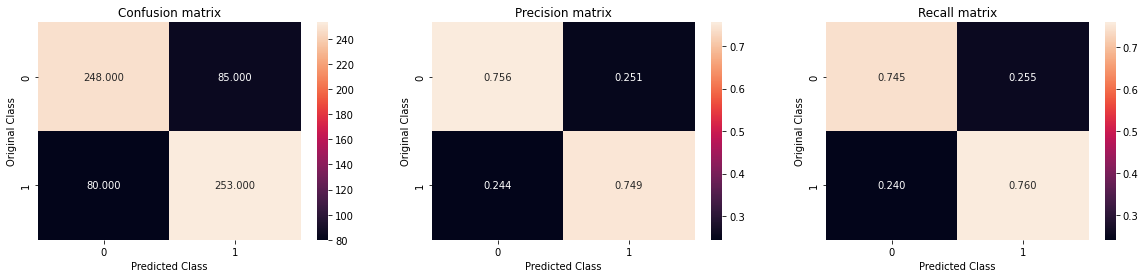

In [ ]:
plot_confusion_matrix(test_labels, y_predLr)

In [ ]:
scores = cross_val_score(lr_clf, features, labels,cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.657 (std: 0.123)



# ***Decision tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 500, random_state = 0)
clf.fit(train_features, train_labels)

DecisionTreeClassifier(max_depth=500, random_state=0)

In [ ]:
y_preddt = clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_preddt

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_preddt))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60       333
           1       0.60      0.58      0.59       333

    accuracy                           0.60       666
   macro avg       0.60      0.60      0.60       666
weighted avg       0.60      0.60      0.60       666



In [ ]:
print(confusion_matrix(test_labels, y_preddt))

[[204 129]
 [140 193]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_preddt))

0.5960960960960962


In [ ]:
# The score method returns the accuracy of the model
score = clf.score(test_features, test_labels)
print(score)

0.5960960960960962


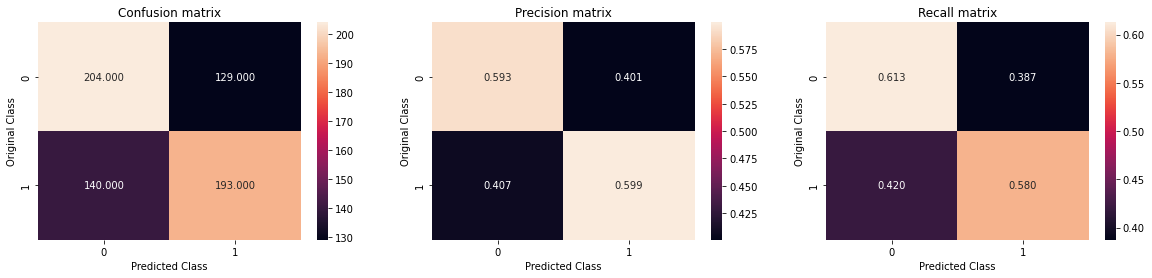

In [ ]:
plot_confusion_matrix(test_labels, y_preddt)

# ***SVM***

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_features, train_labels)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       333
           1       0.74      0.79      0.76       333

    accuracy                           0.75       666
   macro avg       0.76      0.75      0.75       666
weighted avg       0.76      0.75      0.75       666



In [ ]:
print(confusion_matrix(test_labels,y_pred))

[[239  94]
 [ 70 263]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred))

0.7537537537537538


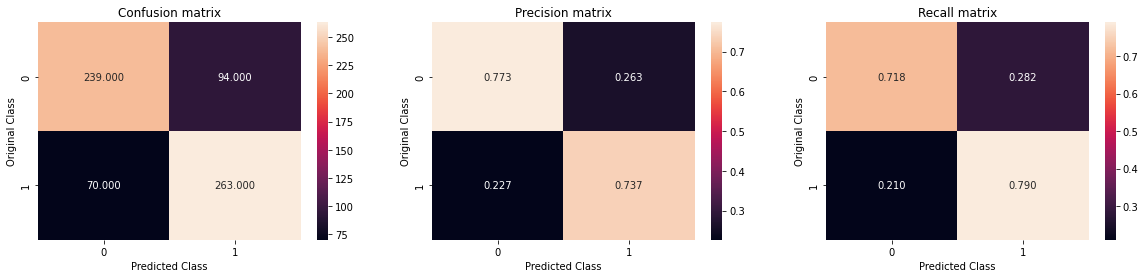

In [ ]:
plot_confusion_matrix(test_labels,y_pred)

# ***mlp***

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
model = MLPClassifier()
model.fit(train_features, train_labels)
print(model)

expected_y  = test_labels
predicted_y = model.predict(test_features)

MLPClassifier()


In [ ]:
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       333
           1       0.74      0.80      0.77       333

    accuracy                           0.76       666
   macro avg       0.76      0.76      0.76       666
weighted avg       0.76      0.76      0.76       666



In [ ]:
print(metrics.confusion_matrix(expected_y, predicted_y))

[[238  95]
 [ 65 268]]


In [ ]:
expected_y, predicted_y = test_labels , clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
predicted_y

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,

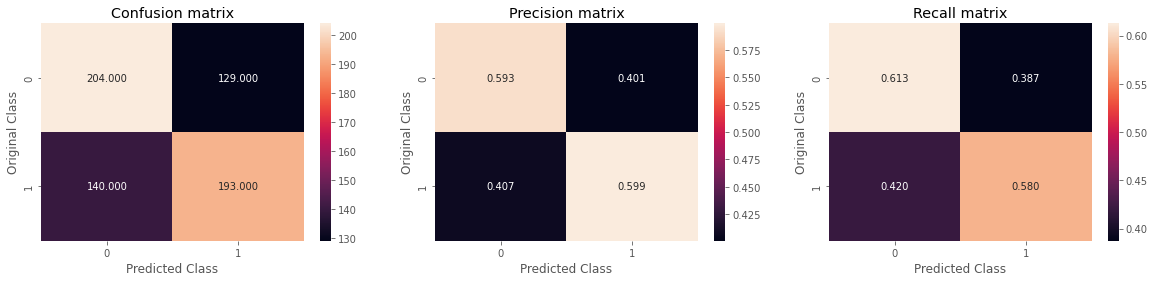

In [ ]:
plot_confusion_matrix(expected_y, predicted_y)

# ***MLP Best params***

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
from sklearn.datasets import make_classification

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,100,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(train_features, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 100, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.597 (+/-0.104) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.608 (+/-0.113) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.572 (+/-0.056) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.594 (+/-0.122) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.600 (+/-0.109) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.594 (+/-0.104) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.589 (+/-0.072) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solve

In [ ]:
y_true, y_pred = test_labels , clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.79      0.72      0.76       333
           1       0.75      0.81      0.78       333

    accuracy                           0.77       666
   macro avg       0.77      0.77      0.77       666
weighted avg       0.77      0.77      0.77       666



In [ ]:
print(confusion_matrix(y_true, y_pred))

[[241  92]
 [ 63 270]]


In [ ]:
y_true, y_pred = test_labels , clf.predict(test_features)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))
clf.score(test_features, test_labels)

0.7672672672672672


0.7672672672672672

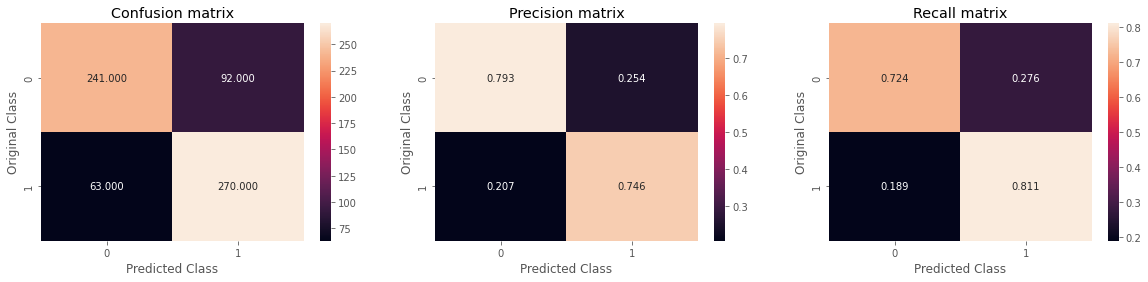

In [ ]:
plot_confusion_matrix(y_true, y_pred)

# ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(train_features, train_labels)
y_pred1 = rf.predict(test_features)
y_pred1

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred1))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       333
           1       0.67      0.61      0.64       333

    accuracy                           0.66       666
   macro avg       0.66      0.66      0.66       666
weighted avg       0.66      0.66      0.66       666



In [ ]:
print(confusion_matrix(test_labels, y_pred1))

[[234  99]
 [129 204]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred1))

0.6576576576576577


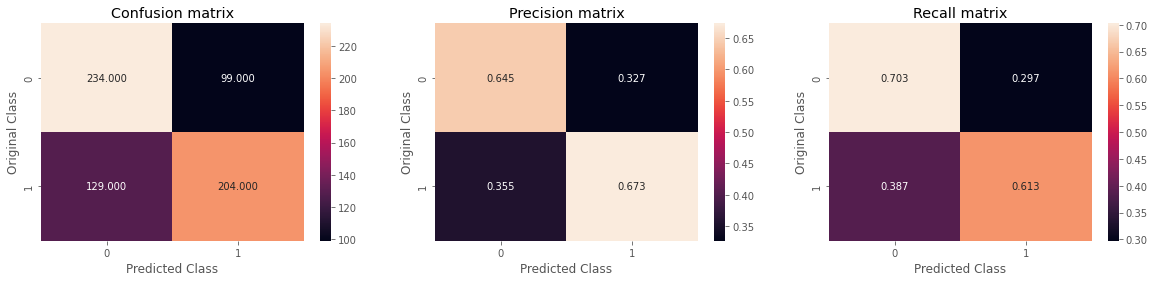

In [ ]:
plot_confusion_matrix(test_labels, y_pred1)

# ***Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_features, train_labels)

GaussianNB()

In [ ]:
y_pred = gnb.predict(test_features)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.6216216216216216


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56       333
           1       0.59      0.77      0.67       333

    accuracy                           0.62       666
   macro avg       0.63      0.62      0.61       666
weighted avg       0.63      0.62      0.61       666



In [ ]:
print(confusion_matrix(test_labels, y_pred))

[[159 174]
 [ 78 255]]


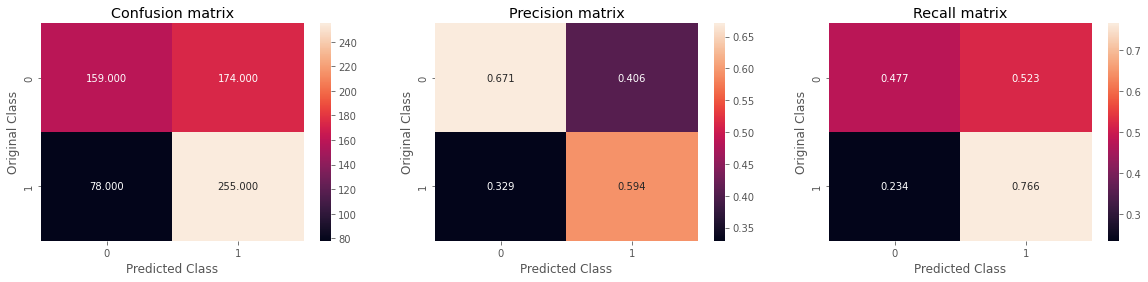

In [ ]:
plot_confusion_matrix(test_labels, y_pred)

# ***XGBoost***

In [ ]:
import xgboost as xgb
modelxgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
modelxgb.fit(train_features, train_labels)

XGBClassifier(learning_rate=0.01, random_state=1)

In [ ]:
predxgb = modelxgb.predict(test_features)
predxgb

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,predxgb))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       333
           1       0.65      0.66      0.65       333

    accuracy                           0.65       666
   macro avg       0.65      0.65      0.65       666
weighted avg       0.65      0.65      0.65       666



In [ ]:
print(confusion_matrix(test_labels, predxgb))

[[216 117]
 [114 219]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predxgb))
modelxgb.score(test_features,test_labels)

0.6531531531531531


0.6531531531531531

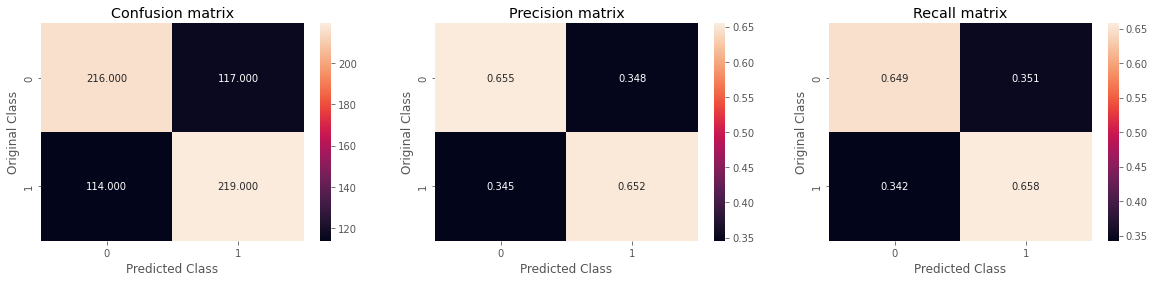

In [ ]:
plot_confusion_matrix(test_labels, predxgb)

# ***KNN***

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(train_features, train_labels)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_features, train_labels)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_features, test_labels)

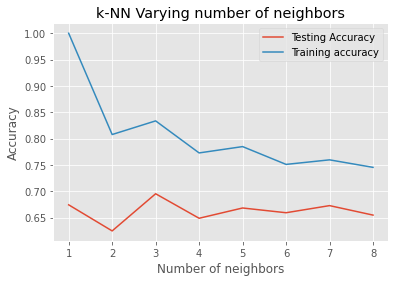

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(train_features,train_labels)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(test_features,test_labels)

0.6726726726726727

In [ ]:
y_pred = knn.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       333
           1       0.70      0.59      0.64       333

    accuracy                           0.67       666
   macro avg       0.68      0.67      0.67       666
weighted avg       0.68      0.67      0.67       666



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels,y_pred))

[[250  83]
 [135 198]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred))

0.6726726726726727


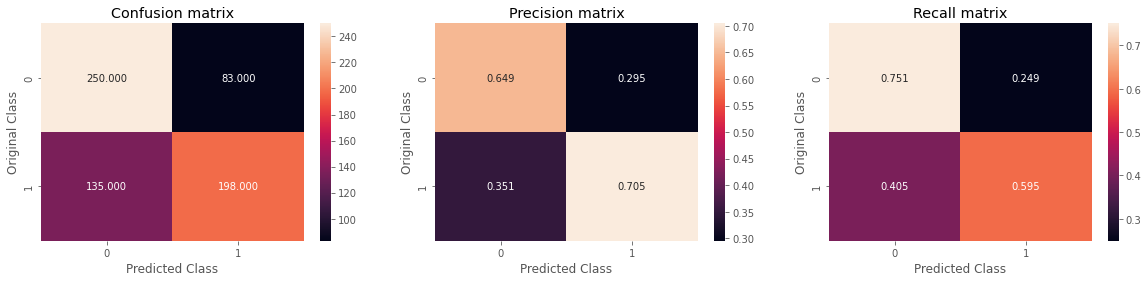

In [ ]:
plot_confusion_matrix(test_labels,y_pred)

# ***Cosine_similarity***

In [ ]:
x = np.asarray(outputp1)
x1 = x[0].tolist()

x = np.asarray(outputp2)
x2 = x[0].tolist()

from math import sqrt

def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

print(cosineSim(x1,x2))

0.9999999999999998
